In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from datetime import datetime
from scipy.signal import lfilter
from statsmodels.tsa.stattools import adfuller
import sklearn
import seaborn as sn
from sklearn.model_selection import train_test_split, cross_val_score
from regressors import stats
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
reddit = {'2019-12-08': {'emo': {'anger': 0, 'fear': 0, 'joy': 1, 'sadness': 1}, 'png': {'pos': 0, 'neg': 2, 'neu': 0, 'sum_c': -1.8197}}, '2019-12-09': {'emo': {'anger': 1, 'fear': 0, 'joy': 0, 'sadness': 0}, 'png': {'pos': 0, 'neg': 1, 'neu': 0, 'sum_c': -0.9515}}, '2019-12-10': {'emo': {'anger': 13, 'fear': 19, 'joy': 1, 'sadness': 6}, 'png': {'pos': 15, 'neg': 13, 'neu': 11, 'sum_c': -1.5506}}, '2019-12-11': {'emo': {'anger': 9, 'fear': 10, 'joy': 1, 'sadness': 4}, 'png': {'pos': 8, 'neg': 12, 'neu': 4, 'sum_c': -2.8764999999999987}}, '2019-12-12': {'emo': {'anger': 6, 'fear': 11, 'joy': 1, 'sadness': 2}, 'png': {'pos': 8, 'neg': 9, 'neu': 3, 'sum_c': -2.7691}}, '2019-12-13': {'emo': {'anger': 0, 'fear': 0, 'joy': 1, 'sadness': 0}, 'png': {'pos': 0, 'neg': 0, 'neu': 1, 'sum_c': 0.0}}, '2019-12-14': {'emo': {'anger': 16, 'fear': 27, 'joy': 9, 'sadness': 3}, 'png': {'pos': 12, 'neg': 23, 'neu': 20, 'sum_c': -6.5502}}, '2019-12-15': {'emo': {'anger': 13, 'fear': 22, 'joy': 3, 'sadness': 5}, 'png': {'pos': 15, 'neg': 20, 'neu': 8, 'sum_c': -5.1732}}, '2019-12-16': {'emo': {'anger': 6, 'fear': 12, 'joy': 2, 'sadness': 3}, 'png': {'pos': 7, 'neg': 8, 'neu': 8, 'sum_c': -1.5979000000000003}}, '2019-12-17': {'emo': {'anger': 29, 'fear': 51, 'joy': 15, 'sadness': 13}, 'png': {'pos': 40, 'neg': 49, 'neu': 19, 'sum_c': -14.3617}}, '2019-12-18': {'emo': {'anger': 3, 'fear': 5, 'joy': 0, 'sadness': 0}, 'png': {'pos': 1, 'neg': 7, 'neu': 0, 'sum_c': -4.800799999999999}}, '2019-12-19': {'emo': {'anger': 79, 'fear': 142, 'joy': 21, 'sadness': 27}, 'png': {'pos': 82, 'neg': 125, 'neu': 62, 'sum_c': -25.6241}}, '2019-12-20': {'emo': {'anger': 27, 'fear': 31, 'joy': 10, 'sadness': 11}, 'png': {'pos': 16, 'neg': 41, 'neu': 22, 'sum_c': -18.217699999999997}}, '2019-12-21': {'emo': {'anger': 17, 'fear': 32, 'joy': 8, 'sadness': 6}, 'png': {'pos': 17, 'neg': 37, 'neu': 9, 'sum_c': -14.313200000000004}}, '2019-12-23': {'emo': {'anger': 0, 'fear': 1, 'joy': 0, 'sadness': 0}, 'png': {'pos': 0, 'neg': 1, 'neu': 0, 'sum_c': -0.5267}}, '2019-12-26': {'emo': {'anger': 23, 'fear': 45, 'joy': 12, 'sadness': 19}, 'png': {'pos': 45, 'neg': 34, 'neu': 20, 'sum_c': 4.093000000000001}}, '2019-12-27': {'emo': {'anger': 36, 'fear': 43, 'joy': 6, 'sadness': 15}, 'png': {'pos': 31, 'neg': 44, 'neu': 25, 'sum_c': -12.300099999999997}}, '2019-12-28': {'emo': {'anger': 1, 'fear': 3, 'joy': 0, 'sadness': 0}, 'png': {'pos': 1, 'neg': 2, 'neu': 1, 'sum_c': -0.07879999999999998}}, '2019-12-29': {'emo': {'anger': 10, 'fear': 21, 'joy': 8, 'sadness': 4}, 'png': {'pos': 13, 'neg': 19, 'neu': 11, 'sum_c': -5.1616}}, '2019-12-30': {'emo': {'anger': 10, 'fear': 24, 'joy': 3, 'sadness': 3}, 'png': {'pos': 14, 'neg': 15, 'neu': 11, 'sum_c': -2.792200000000001}}, '2019-12-31': {'emo': {'anger': 2, 'fear': 2, 'joy': 0, 'sadness': 0}, 'png': {'pos': 1, 'neg': 1, 'neu': 2, 'sum_c': -0.1747}}, '2020-01-01': {'emo': {'anger': 19, 'fear': 42, 'joy': 12, 'sadness': 12}, 'png': {'pos': 31, 'neg': 37, 'neu': 17, 'sum_c': -7.360999999999998}}, '2020-01-02': {'emo': {'anger': 31, 'fear': 65, 'joy': 11, 'sadness': 19}, 'png': {'pos': 49, 'neg': 44, 'neu': 33, 'sum_c': -0.19439999999999735}}, '2020-01-03': {'emo': {'anger': 62, 'fear': 132, 'joy': 20, 'sadness': 32}, 'png': {'pos': 61, 'neg': 126, 'neu': 59, 'sum_c': -48.47669999999998}}, '2020-01-04': {'emo': {'anger': 50, 'fear': 101, 'joy': 17, 'sadness': 15}, 'png': {'pos': 53, 'neg': 85, 'neu': 45, 'sum_c': -23.928900000000002}}, '2020-01-05': {'emo': {'anger': 39, 'fear': 84, 'joy': 12, 'sadness': 13}, 'png': {'pos': 44, 'neg': 75, 'neu': 29, 'sum_c': -22.916100000000004}}, '2020-01-06': {'emo': {'anger': 9, 'fear': 27, 'joy': 6, 'sadness': 2}, 'png': {'pos': 15, 'neg': 11, 'neu': 18, 'sum_c': 0.8651}}, '2020-01-07': {'emo': {'anger': 3, 'fear': 1, 'joy': 2, 'sadness': 0}, 'png': {'pos': 2, 'neg': 2, 'neu': 2, 'sum_c': -0.09079999999999994}}, '2020-01-08': {'emo': {'anger': 52, 'fear': 75, 'joy': 16, 'sadness': 17}, 'png': {'pos': 48, 'neg': 80, 'neu': 32, 'sum_c': -23.702199999999998}}, '2020-01-09': {'emo': {'anger': 42, 'fear': 69, 'joy': 15, 'sadness': 24}, 'png': {'pos': 51, 'neg': 62, 'neu': 37, 'sum_c': -8.694500000000005}}, '2020-01-10': {'emo': {'anger': 5, 'fear': 3, 'joy': 0, 'sadness': 4}, 'png': {'pos': 4, 'neg': 7, 'neu': 1, 'sum_c': -3.0828999999999995}}, '2020-01-11': {'emo': {'anger': 35, 'fear': 47, 'joy': 7, 'sadness': 10}, 'png': {'pos': 20, 'neg': 58, 'neu': 21, 'sum_c': -25.15709999999999}}, '2020-01-12': {'emo': {'anger': 41, 'fear': 77, 'joy': 14, 'sadness': 9}, 'png': {'pos': 44, 'neg': 73, 'neu': 24, 'sum_c': -24.272300000000005}}, '2020-01-13': {'emo': {'anger': 27, 'fear': 71, 'joy': 7, 'sadness': 11}, 'png': {'pos': 39, 'neg': 58, 'neu': 19, 'sum_c': -9.951}}, '2020-01-14': {'emo': {'anger': 36, 'fear': 60, 'joy': 13, 'sadness': 12}, 'png': {'pos': 53, 'neg': 39, 'neu': 29, 'sum_c': 7.230500000000001}}, '2020-01-15': {'emo': {'anger': 55, 'fear': 68, 'joy': 19, 'sadness': 22}, 'png': {'pos': 67, 'neg': 75, 'neu': 22, 'sum_c': -8.372999999999998}}, '2020-01-16': {'emo': {'anger': 19, 'fear': 52, 'joy': 8, 'sadness': 9}, 'png': {'pos': 32, 'neg': 30, 'neu': 26, 'sum_c': -1.1156999999999986}}, '2020-01-17': {'emo': {'anger': 3, 'fear': 8, 'joy': 1, 'sadness': 3}, 'png': {'pos': 3, 'neg': 7, 'neu': 5, 'sum_c': -3.2120000000000006}}, '2020-01-18': {'emo': {'anger': 7, 'fear': 23, 'joy': 3, 'sadness': 8}, 'png': {'pos': 17, 'neg': 11, 'neu': 13, 'sum_c': 3.2078}}, '2020-01-19': {'emo': {'anger': 24, 'fear': 45, 'joy': 9, 'sadness': 8}, 'png': {'pos': 18, 'neg': 42, 'neu': 26, 'sum_c': -13.8588}}, '2020-01-20': {'emo': {'anger': 52, 'fear': 100, 'joy': 14, 'sadness': 12}, 'png': {'pos': 47, 'neg': 88, 'neu': 43, 'sum_c': -26.865699999999997}}, '2020-01-21': {'emo': {'anger': 39, 'fear': 80, 'joy': 12, 'sadness': 11}, 'png': {'pos': 44, 'neg': 57, 'neu': 41, 'sum_c': -5.946100000000001}}, '2020-01-22': {'emo': {'anger': 50, 'fear': 91, 'joy': 18, 'sadness': 9}, 'png': {'pos': 65, 'neg': 59, 'neu': 44, 'sum_c': 1.702099999999999}}, '2020-01-23': {'emo': {'anger': 99, 'fear': 207, 'joy': 48, 'sadness': 36}, 'png': {'pos': 115, 'neg': 149, 'neu': 126, 'sum_c': -24.164399999999976}}, '2020-01-24': {'emo': {'anger': 126, 'fear': 204, 'joy': 37, 'sadness': 36}, 'png': {'pos': 120, 'neg': 149, 'neu': 134, 'sum_c': -27.389000000000006}}, '2020-01-25': {'emo': {'anger': 123, 'fear': 221, 'joy': 46, 'sadness': 39}, 'png': {'pos': 112, 'neg': 195, 'neu': 122, 'sum_c': -52.0939}}, '2020-01-26': {'emo': {'anger': 105, 'fear': 195, 'joy': 36, 'sadness': 45}, 'png': {'pos': 116, 'neg': 161, 'neu': 104, 'sum_c': -28.254199999999997}}, '2020-01-27': {'emo': {'anger': 152, 'fear': 321, 'joy': 69, 'sadness': 76}, 'png': {'pos': 207, 'neg': 251, 'neu': 160, 'sum_c': -27.417500000000004}}, '2020-01-28': {'emo': {'anger': 101, 'fear': 211, 'joy': 39, 'sadness': 41}, 'png': {'pos': 123, 'neg': 170, 'neu': 99, 'sum_c': -33.672299999999986}}, '2020-01-29': {'emo': {'anger': 54, 'fear': 86, 'joy': 17, 'sadness': 10}, 'png': {'pos': 42, 'neg': 72, 'neu': 53, 'sum_c': -21.4653}}, '2020-01-30': {'emo': {'anger': 81, 'fear': 180, 'joy': 31, 'sadness': 43}, 'png': {'pos': 95, 'neg': 136, 'neu': 104, 'sum_c': -28.1692}}, '2020-01-31': {'emo': {'anger': 71, 'fear': 191, 'joy': 32, 'sadness': 44}, 'png': {'pos': 96, 'neg': 144, 'neu': 98, 'sum_c': -37.29480000000002}}, '2020-02-01': {'emo': {'anger': 61, 'fear': 67, 'joy': 18, 'sadness': 26}, 'png': {'pos': 51, 'neg': 84, 'neu': 37, 'sum_c': -28.034000000000006}}, '2020-02-02': {'emo': {'anger': 16, 'fear': 31, 'joy': 3, 'sadness': 6}, 'png': {'pos': 15, 'neg': 30, 'neu': 11, 'sum_c': -9.9592}}, '2020-02-03': {'emo': {'anger': 12, 'fear': 25, 'joy': 4, 'sadness': 6}, 'png': {'pos': 13, 'neg': 14, 'neu': 20, 'sum_c': -1.7912000000000008}}, '2020-02-04': {'emo': {'anger': 6, 'fear': 26, 'joy': 0, 'sadness': 1}, 'png': {'pos': 3, 'neg': 17, 'neu': 13, 'sum_c': -7.4986999999999995}}, '2020-02-05': {'emo': {'anger': 116, 'fear': 238, 'joy': 40, 'sadness': 42}, 'png': {'pos': 176, 'neg': 159, 'neu': 101, 'sum_c': 4.336300000000001}}, '2020-02-06': {'emo': {'anger': 45, 'fear': 82, 'joy': 18, 'sadness': 12}, 'png': {'pos': 60, 'neg': 57, 'neu': 40, 'sum_c': 1.0718000000000003}}, '2020-02-07': {'emo': {'anger': 37, 'fear': 78, 'joy': 11, 'sadness': 12}, 'png': {'pos': 53, 'neg': 54, 'neu': 31, 'sum_c': 1.1269000000000025}}, '2020-02-08': {'emo': {'anger': 63, 'fear': 126, 'joy': 20, 'sadness': 21}, 'png': {'pos': 80, 'neg': 82, 'neu': 68, 'sum_c': -9.1345}}, '2020-02-09': {'emo': {'anger': 46, 'fear': 90, 'joy': 11, 'sadness': 18}, 'png': {'pos': 39, 'neg': 82, 'neu': 44, 'sum_c': -30.19939999999999}}, '2020-02-10': {'emo': {'anger': 12, 'fear': 32, 'joy': 6, 'sadness': 5}, 'png': {'pos': 14, 'neg': 27, 'neu': 14, 'sum_c': -10.612400000000001}}, '2020-02-11': {'emo': {'anger': 42, 'fear': 92, 'joy': 11, 'sadness': 13}, 'png': {'pos': 60, 'neg': 70, 'neu': 28, 'sum_c': -13.628799999999998}}, '2020-02-12': {'emo': {'anger': 71, 'fear': 158, 'joy': 19, 'sadness': 41}, 'png': {'pos': 110, 'neg': 121, 'neu': 58, 'sum_c': -12.2621}}, '2020-02-13': {'emo': {'anger': 7, 'fear': 22, 'joy': 8, 'sadness': 4}, 'png': {'pos': 12, 'neg': 19, 'neu': 10, 'sum_c': -5.532999999999999}}, '2020-02-14': {'emo': {'anger': 47, 'fear': 93, 'joy': 23, 'sadness': 21}, 'png': {'pos': 60, 'neg': 94, 'neu': 30, 'sum_c': -27.30979999999999}}, '2020-02-15': {'emo': {'anger': 31, 'fear': 57, 'joy': 8, 'sadness': 11}, 'png': {'pos': 39, 'neg': 46, 'neu': 22, 'sum_c': -5.633100000000002}}, '2020-02-16': {'emo': {'anger': 8, 'fear': 14, 'joy': 3, 'sadness': 3}, 'png': {'pos': 6, 'neg': 17, 'neu': 5, 'sum_c': -7.047300000000002}}, '2020-02-17': {'emo': {'anger': 16, 'fear': 38, 'joy': 6, 'sadness': 3}, 'png': {'pos': 22, 'neg': 25, 'neu': 16, 'sum_c': -6.067500000000002}}, '2020-02-18': {'emo': {'anger': 25, 'fear': 70, 'joy': 16, 'sadness': 8}, 'png': {'pos': 46, 'neg': 38, 'neu': 35, 'sum_c': 2.9035000000000006}}, '2020-02-19': {'emo': {'anger': 38, 'fear': 82, 'joy': 7, 'sadness': 24}, 'png': {'pos': 62, 'neg': 56, 'neu': 33, 'sum_c': 1.7561999999999975}}, '2020-02-20': {'emo': {'anger': 57, 'fear': 156, 'joy': 31, 'sadness': 36}, 'png': {'pos': 90, 'neg': 141, 'neu': 49, 'sum_c': -39.22059999999997}}, '2020-02-21': {'emo': {'anger': 134, 'fear': 330, 'joy': 58, 'sadness': 66}, 'png': {'pos': 219, 'neg': 259, 'neu': 110, 'sum_c': -31.6992}}, '2020-02-22': {'emo': {'anger': 76, 'fear': 75, 'joy': 22, 'sadness': 25}, 'png': {'pos': 61, 'neg': 79, 'neu': 58, 'sum_c': -14.811699999999997}}, '2020-02-23': {'emo': {'anger': 30, 'fear': 56, 'joy': 8, 'sadness': 11}, 'png': {'pos': 34, 'neg': 44, 'neu': 27, 'sum_c': -5.879899999999999}}, '2020-02-24': {'emo': {'anger': 64, 'fear': 86, 'joy': 16, 'sadness': 20}, 'png': {'pos': 77, 'neg': 69, 'neu': 40, 'sum_c': -4.728199999999998}}, '2020-02-25': {'emo': {'anger': 41, 'fear': 79, 'joy': 16, 'sadness': 23}, 'png': {'pos': 63, 'neg': 47, 'neu': 49, 'sum_c': 11.257699999999998}}, '2020-02-26': {'emo': {'anger': 75, 'fear': 173, 'joy': 32, 'sadness': 27}, 'png': {'pos': 95, 'neg': 138, 'neu': 74, 'sum_c': -28.834499999999984}}, '2020-02-27': {'emo': {'anger': 155, 'fear': 264, 'joy': 72, 'sadness': 55}, 'png': {'pos': 217, 'neg': 200, 'neu': 129, 'sum_c': -0.818100000000004}}, '2020-02-28': {'emo': {'anger': 132, 'fear': 227, 'joy': 70, 'sadness': 59}, 'png': {'pos': 181, 'neg': 191, 'neu': 116, 'sum_c': -4.544799999999998}}, '2020-02-29': {'emo': {'anger': 214, 'fear': 464, 'joy': 88, 'sadness': 105}, 'png': {'pos': 276, 'neg': 382, 'neu': 213, 'sum_c': -79.98570000000007}}, '2020-03-01': {'emo': {'anger': 85, 'fear': 137, 'joy': 26, 'sadness': 65}, 'png': {'pos': 126, 'neg': 122, 'neu': 65, 'sum_c': 2.8870999999999936}}, '2020-03-02': {'emo': {'anger': 85, 'fear': 177, 'joy': 47, 'sadness': 44}, 'png': {'pos': 134, 'neg': 115, 'neu': 104, 'sum_c': 8.036200000000003}}, '2020-03-03': {'emo': {'anger': 111, 'fear': 232, 'joy': 44, 'sadness': 38}, 'png': {'pos': 135, 'neg': 157, 'neu': 133, 'sum_c': -21.539800000000007}}, '2020-03-04': {'emo': {'anger': 138, 'fear': 267, 'joy': 67, 'sadness': 54}, 'png': {'pos': 182, 'neg': 198, 'neu': 146, 'sum_c': -14.657299999999992}}, '2020-03-05': {'emo': {'anger': 121, 'fear': 213, 'joy': 25, 'sadness': 39}, 'png': {'pos': 126, 'neg': 153, 'neu': 119, 'sum_c': -25.302099999999985}}, '2020-03-06': {'emo': {'anger': 121, 'fear': 305, 'joy': 64, 'sadness': 55}, 'png': {'pos': 185, 'neg': 243, 'neu': 117, 'sum_c': -39.92030000000002}}, '2020-03-07': {'emo': {'anger': 130, 'fear': 248, 'joy': 40, 'sadness': 48}, 'png': {'pos': 149, 'neg': 186, 'neu': 131, 'sum_c': -24.4878}}, '2020-03-08': {'emo': {'anger': 197, 'fear': 359, 'joy': 69, 'sadness': 83}, 'png': {'pos': 209, 'neg': 320, 'neu': 179, 'sum_c': -76.97200000000001}}, '2020-03-09': {'emo': {'anger': 169, 'fear': 410, 'joy': 66, 'sadness': 83}, 'png': {'pos': 229, 'neg': 329, 'neu': 170, 'sum_c': -67.46049999999995}}, '2020-03-10': {'emo': {'anger': 234, 'fear': 532, 'joy': 95, 'sadness': 122}, 'png': {'pos': 357, 'neg': 364, 'neu': 262, 'sum_c': -10.439200000000007}}, '2020-03-11': {'emo': {'anger': 350, 'fear': 626, 'joy': 133, 'sadness': 137}, 'png': {'pos': 463, 'neg': 447, 'neu': 336, 'sum_c': 8.836400000000003}}, '2020-03-12': {'emo': {'anger': 727, 'fear': 1333, 'joy': 255, 'sadness': 276}, 'png': {'pos': 859, 'neg': 1131, 'neu': 601, 'sum_c': -203.27390000000014}}, '2020-03-13': {'emo': {'anger': 630, 'fear': 1207, 'joy': 253, 'sadness': 218}, 'png': {'pos': 793, 'neg': 926, 'neu': 589, 'sum_c': -101.2134000000002}}, '2020-03-14': {'emo': {'anger': 326, 'fear': 617, 'joy': 120, 'sadness': 133}, 'png': {'pos': 362, 'neg': 557, 'neu': 277, 'sum_c': -123.13590000000002}}, '2020-03-15': {'emo': {'anger': 241, 'fear': 439, 'joy': 94, 'sadness': 92}, 'png': {'pos': 259, 'neg': 377, 'neu': 230, 'sum_c': -82.67929999999991}}, '2020-03-16': {'emo': {'anger': 266, 'fear': 575, 'joy': 119, 'sadness': 127}, 'png': {'pos': 358, 'neg': 463, 'neu': 266, 'sum_c': -75.05490000000017}}, '2020-03-17': {'emo': {'anger': 563, 'fear': 1008, 'joy': 191, 'sadness': 222}, 'png': {'pos': 539, 'neg': 906, 'neu': 539, 'sum_c': -247.87469999999965}}, '2020-03-18': {'emo': {'anger': 451, 'fear': 801, 'joy': 137, 'sadness': 166}, 'png': {'pos': 471, 'neg': 639, 'neu': 445, 'sum_c': -135.17899999999992}}, '2020-03-19': {'emo': {'anger': 502, 'fear': 915, 'joy': 200, 'sadness': 252}, 'png': {'pos': 560, 'neg': 887, 'neu': 422, 'sum_c': -227.66460000000032}}, '2020-03-20': {'emo': {'anger': 315, 'fear': 638, 'joy': 137, 'sadness': 169}, 'png': {'pos': 365, 'neg': 599, 'neu': 295, 'sum_c': -165.2626000000002}}, '2020-03-21': {'emo': {'anger': 322, 'fear': 673, 'joy': 155, 'sadness': 121}, 'png': {'pos': 395, 'neg': 588, 'neu': 288, 'sum_c': -147.38539999999995}}, '2020-03-22': {'emo': {'anger': 394, 'fear': 785, 'joy': 136, 'sadness': 148}, 'png': {'pos': 469, 'neg': 623, 'neu': 371, 'sum_c': -129.09500000000034}}, '2020-03-23': {'emo': {'anger': 446, 'fear': 864, 'joy': 143, 'sadness': 166}, 'png': {'pos': 519, 'neg': 729, 'neu': 371, 'sum_c': -149.76400000000015}}, '2020-03-24': {'emo': {'anger': 653, 'fear': 1082, 'joy': 225, 'sadness': 230}, 'png': {'pos': 704, 'neg': 1031, 'neu': 455, 'sum_c': -233.52859999999976}}, '2020-03-25': {'emo': {'anger': 501, 'fear': 1062, 'joy': 220, 'sadness': 206}, 'png': {'pos': 684, 'neg': 839, 'neu': 466, 'sum_c': -128.1605000000002}}, '2020-03-26': {'emo': {'anger': 472, 'fear': 1025, 'joy': 206, 'sadness': 229}, 'png': {'pos': 649, 'neg': 804, 'neu': 479, 'sum_c': -135.0725000000001}}, '2020-03-27': {'emo': {'anger': 567, 'fear': 1247, 'joy': 218, 'sadness': 223}, 'png': {'pos': 822, 'neg': 877, 'neu': 556, 'sum_c': -65.01290000000009}}, '2020-03-28': {'emo': {'anger': 660, 'fear': 1441, 'joy': 229, 'sadness': 258}, 'png': {'pos': 912, 'neg': 1041, 'neu': 635, 'sum_c': -135.11370000000005}}, '2020-03-29': {'emo': {'anger': 1809, 'fear': 3388, 'joy': 745, 'sadness': 744}, 'png': {'pos': 2438, 'neg': 2491, 'neu': 1757, 'sum_c': -148.86680000000095}}, '2020-03-30': {'emo': {'anger': 3916, 'fear': 7802, 'joy': 1630, 'sadness': 1793}, 'png': {'pos': 5113, 'neg': 6136, 'neu': 3892, 'sum_c': -811.407899999994}}, '2020-03-31': {'emo': {'anger': 3943, 'fear': 8136, 'joy': 1612, 'sadness': 1816}, 'png': {'pos': 5461, 'neg': 5925, 'neu': 4121, 'sum_c': -416.80769999999904}}, '2020-04-01': {'emo': {'anger': 4048, 'fear': 8188, 'joy': 1668, 'sadness': 1960}, 'png': {'pos': 5404, 'neg': 6608, 'neu': 3852, 'sum_c': -935.5186999999913}}, '2020-04-02': {'emo': {'anger': 3745, 'fear': 7434, 'joy': 1416, 'sadness': 1908}, 'png': {'pos': 5003, 'neg': 5788, 'neu': 3712, 'sum_c': -700.9459000000005}}, '2020-04-03': {'emo': {'anger': 3657, 'fear': 6892, 'joy': 1494, 'sadness': 1715}, 'png': {'pos': 4759, 'neg': 5466, 'neu': 3533, 'sum_c': -549.3235999999981}}, '2020-04-04': {'emo': {'anger': 3084, 'fear': 6198, 'joy': 1250, 'sadness': 1492}, 'png': {'pos': 4135, 'neg': 4908, 'neu': 2981, 'sum_c': -621.3921999999978}}, '2020-04-05': {'emo': {'anger': 3285, 'fear': 6133, 'joy': 1295, 'sadness': 1524}, 'png': {'pos': 4284, 'neg': 4829, 'neu': 3124, 'sum_c': -498.542799999998}}, '2020-04-06': {'emo': {'anger': 2922, 'fear': 5363, 'joy': 1089, 'sadness': 1269}, 'png': {'pos': 3742, 'neg': 4152, 'neu': 2749, 'sum_c': -393.7489999999992}}, '2020-04-07': {'emo': {'anger': 3062, 'fear': 6062, 'joy': 1276, 'sadness': 1376}, 'png': {'pos': 4231, 'neg': 4362, 'neu': 3183, 'sum_c': -182.8343000000009}}, '2020-04-08': {'emo': {'anger': 3494, 'fear': 6894, 'joy': 1437, 'sadness': 1775}, 'png': {'pos': 5058, 'neg': 5347, 'neu': 3195, 'sum_c': -310.81199999999825}}, '2020-04-09': {'emo': {'anger': 2343, 'fear': 4735, 'joy': 932, 'sadness': 1143}, 'png': {'pos': 3311, 'neg': 3442, 'neu': 2400, 'sum_c': -148.86130000000057}}, '2020-04-10': {'emo': {'anger': 2519, 'fear': 5111, 'joy': 1074, 'sadness': 1200}, 'png': {'pos': 3579, 'neg': 3818, 'neu': 2507, 'sum_c': -234.58830000000117}}, '2020-04-11': {'emo': {'anger': 2483, 'fear': 5292, 'joy': 959, 'sadness': 1185}, 'png': {'pos': 3400, 'neg': 3934, 'neu': 2585, 'sum_c': -402.15359999999964}}, '2020-04-12': {'emo': {'anger': 1929, 'fear': 3925, 'joy': 691, 'sadness': 824}, 'png': {'pos': 2512, 'neg': 2981, 'neu': 1876, 'sum_c': -362.2729999999986}}, '2020-04-13': {'emo': {'anger': 2058, 'fear': 3945, 'joy': 769, 'sadness': 880}, 'png': {'pos': 2691, 'neg': 3173, 'neu': 1788, 'sum_c': -369.9778000000004}}, '2020-04-14': {'emo': {'anger': 2674, 'fear': 5529, 'joy': 1142, 'sadness': 1177}, 'png': {'pos': 3766, 'neg': 4082, 'neu': 2674, 'sum_c': -283.880099999999}}, '2020-04-15': {'emo': {'anger': 2584, 'fear': 5393, 'joy': 1034, 'sadness': 1064}, 'png': {'pos': 3481, 'neg': 4129, 'neu': 2465, 'sum_c': -540.6879999999978}}, '2020-04-16': {'emo': {'anger': 2465, 'fear': 4704, 'joy': 953, 'sadness': 1051}, 'png': {'pos': 3252, 'neg': 3579, 'neu': 2342, 'sum_c': -273.0789000000003}}, '2020-04-17': {'emo': {'anger': 1124, 'fear': 2152, 'joy': 378, 'sadness': 498}, 'png': {'pos': 1349, 'neg': 1771, 'neu': 1032, 'sum_c': -315.8051000000009}}, '2020-04-18': {'emo': {'anger': 2585, 'fear': 5056, 'joy': 969, 'sadness': 1183}, 'png': {'pos': 3211, 'neg': 4058, 'neu': 2524, 'sum_c': -632.017599999999}}, '2020-04-19': {'emo': {'anger': 1844, 'fear': 3580, 'joy': 756, 'sadness': 854}, 'png': {'pos': 2334, 'neg': 2960, 'neu': 1740, 'sum_c': -448.13629999999887}}, '2020-04-20': {'emo': {'anger': 1851, 'fear': 3503, 'joy': 675, 'sadness': 803}, 'png': {'pos': 2404, 'neg': 2766, 'neu': 1662, 'sum_c': -272.11239999999947}}, '2020-04-21': {'emo': {'anger': 1941, 'fear': 4269, 'joy': 713, 'sadness': 983}, 'png': {'pos': 2730, 'neg': 3262, 'neu': 1914, 'sum_c': -427.3727999999996}}, '2020-04-22': {'emo': {'anger': 2074, 'fear': 3866, 'joy': 800, 'sadness': 937}, 'png': {'pos': 2580, 'neg': 3136, 'neu': 1961, 'sum_c': -395.2613000000001}}, '2020-04-23': {'emo': {'anger': 1029, 'fear': 2025, 'joy': 420, 'sadness': 421}, 'png': {'pos': 1354, 'neg': 1538, 'neu': 1003, 'sum_c': -170.27840000000035}}, '2020-04-24': {'emo': {'anger': 1742, 'fear': 3077, 'joy': 654, 'sadness': 704}, 'png': {'pos': 2115, 'neg': 2517, 'neu': 1545, 'sum_c': -316.51419999999996}}, '2020-04-25': {'emo': {'anger': 1117, 'fear': 2168, 'joy': 410, 'sadness': 444}, 'png': {'pos': 1400, 'neg': 1712, 'neu': 1027, 'sum_c': -258.9953999999995}}, '2020-04-26': {'emo': {'anger': 1743, 'fear': 3391, 'joy': 668, 'sadness': 752}, 'png': {'pos': 2220, 'neg': 2678, 'neu': 1656, 'sum_c': -374.7169999999999}}, '2020-04-27': {'emo': {'anger': 1965, 'fear': 3931, 'joy': 854, 'sadness': 929}, 'png': {'pos': 2718, 'neg': 3148, 'neu': 1813, 'sum_c': -372.3954999999999}}, '2020-04-28': {'emo': {'anger': 1997, 'fear': 4062, 'joy': 766, 'sadness': 881}, 'png': {'pos': 2687, 'neg': 3083, 'neu': 1936, 'sum_c': -348.60419999999914}}, '2020-04-29': {'emo': {'anger': 1617, 'fear': 3615, 'joy': 705, 'sadness': 745}, 'png': {'pos': 2433, 'neg': 2550, 'neu': 1699, 'sum_c': -179.21880000000073}}, '2020-04-30': {'emo': {'anger': 864, 'fear': 1937, 'joy': 354, 'sadness': 457}, 'png': {'pos': 1260, 'neg': 1441, 'neu': 911, 'sum_c': -119.11180000000027}}, '2020-05-01': {'emo': {'anger': 717, 'fear': 1402, 'joy': 268, 'sadness': 300}, 'png': {'pos': 935, 'neg': 1146, 'neu': 606, 'sum_c': -166.3475000000001}}, '2020-05-02': {'emo': {'anger': 520, 'fear': 1153, 'joy': 195, 'sadness': 227}, 'png': {'pos': 684, 'neg': 975, 'neu': 436, 'sum_c': -185.2865000000003}}, '2020-05-03': {'emo': {'anger': 299, 'fear': 603, 'joy': 148, 'sadness': 127}, 'png': {'pos': 402, 'neg': 494, 'neu': 281, 'sum_c': -71.12880000000008}}}


In [3]:
len(reddit.keys())

145

In [4]:
twitter = {'2020-01-09': {'emo': {'anger': 1, 'fear': 0, 'joy': 0, 'sadness': 0}, 'png': {'pos': 0, 'neg': 1, 'neu': 0, 'sum_c': -0.4019}}, '2020-01-17': {'emo': {'anger': 1, 'fear': 0, 'joy': 0, 'sadness': 0}, 'png': {'pos': 0, 'neg': 0, 'neu': 1, 'sum_c': 0.0}}, '2020-01-19': {'emo': {'anger': 0, 'fear': 0, 'joy': 1, 'sadness': 0}, 'png': {'pos': 0, 'neg': 0, 'neu': 1, 'sum_c': 0.0}}, '2020-01-20': {'emo': {'anger': 1, 'fear': 1, 'joy': 0, 'sadness': 0}, 'png': {'pos': 0, 'neg': 1, 'neu': 1, 'sum_c': -0.5574}}, '2020-01-21': {'emo': {'anger': 1, 'fear': 3, 'joy': 1, 'sadness': 1}, 'png': {'pos': 2, 'neg': 2, 'neu': 2, 'sum_c': -0.34409999999999996}}, '2020-01-22': {'emo': {'anger': 6, 'fear': 9, 'joy': 2, 'sadness': 1}, 'png': {'pos': 4, 'neg': 5, 'neu': 9, 'sum_c': -1.4536000000000002}}, '2020-01-23': {'emo': {'anger': 4, 'fear': 12, 'joy': 1, 'sadness': 1}, 'png': {'pos': 1, 'neg': 9, 'neu': 8, 'sum_c': -4.5061}}, '2020-01-24': {'emo': {'anger': 9, 'fear': 13, 'joy': 3, 'sadness': 2}, 'png': {'pos': 3, 'neg': 10, 'neu': 14, 'sum_c': -3.3941}}, '2020-01-25': {'emo': {'anger': 10, 'fear': 21, 'joy': 0, 'sadness': 4}, 'png': {'pos': 7, 'neg': 17, 'neu': 11, 'sum_c': -4.6693}}, '2020-01-26': {'emo': {'anger': 7, 'fear': 25, 'joy': 0, 'sadness': 3}, 'png': {'pos': 4, 'neg': 12, 'neu': 19, 'sum_c': -3.1264000000000003}}, '2020-01-27': {'emo': {'anger': 12, 'fear': 16, 'joy': 0, 'sadness': 4}, 'png': {'pos': 5, 'neg': 17, 'neu': 10, 'sum_c': -6.784700000000001}}, '2020-01-28': {'emo': {'anger': 12, 'fear': 8, 'joy': 1, 'sadness': 2}, 'png': {'pos': 3, 'neg': 11, 'neu': 9, 'sum_c': -3.8399000000000005}}, '2020-01-29': {'emo': {'anger': 5, 'fear': 13, 'joy': 1, 'sadness': 2}, 'png': {'pos': 9, 'neg': 5, 'neu': 7, 'sum_c': 0.6099000000000002}}, '2020-01-30': {'emo': {'anger': 11, 'fear': 32, 'joy': 2, 'sadness': 4}, 'png': {'pos': 13, 'neg': 16, 'neu': 20, 'sum_c': -1.6706000000000005}}, '2020-01-31': {'emo': {'anger': 14, 'fear': 33, 'joy': 3, 'sadness': 1}, 'png': {'pos': 17, 'neg': 21, 'neu': 13, 'sum_c': -2.0003}}, '2020-02-01': {'emo': {'anger': 8, 'fear': 27, 'joy': 4, 'sadness': 0}, 'png': {'pos': 7, 'neg': 13, 'neu': 19, 'sum_c': -2.8662}}, '2020-02-02': {'emo': {'anger': 10, 'fear': 20, 'joy': 1, 'sadness': 4}, 'png': {'pos': 6, 'neg': 15, 'neu': 14, 'sum_c': -4.768400000000001}}, '2020-02-03': {'emo': {'anger': 8, 'fear': 21, 'joy': 4, 'sadness': 2}, 'png': {'pos': 11, 'neg': 18, 'neu': 6, 'sum_c': -4.2305}}, '2020-02-04': {'emo': {'anger': 5, 'fear': 9, 'joy': 2, 'sadness': 1}, 'png': {'pos': 4, 'neg': 9, 'neu': 4, 'sum_c': -2.9557}}, '2020-02-05': {'emo': {'anger': 7, 'fear': 19, 'joy': 5, 'sadness': 1}, 'png': {'pos': 15, 'neg': 10, 'neu': 7, 'sum_c': 2.1218}}, '2020-02-06': {'emo': {'anger': 8, 'fear': 14, 'joy': 3, 'sadness': 6}, 'png': {'pos': 3, 'neg': 19, 'neu': 9, 'sum_c': -8.016499999999999}}, '2020-02-07': {'emo': {'anger': 2, 'fear': 12, 'joy': 0, 'sadness': 4}, 'png': {'pos': 6, 'neg': 6, 'neu': 6, 'sum_c': -1.0981}}, '2020-02-08': {'emo': {'anger': 6, 'fear': 14, 'joy': 0, 'sadness': 3}, 'png': {'pos': 6, 'neg': 12, 'neu': 5, 'sum_c': -3.5972999999999997}}, '2020-02-09': {'emo': {'anger': 12, 'fear': 16, 'joy': 4, 'sadness': 6}, 'png': {'pos': 12, 'neg': 17, 'neu': 9, 'sum_c': -4.5862}}, '2020-02-10': {'emo': {'anger': 9, 'fear': 13, 'joy': 2, 'sadness': 0}, 'png': {'pos': 6, 'neg': 7, 'neu': 11, 'sum_c': -0.9051999999999997}}, '2020-02-11': {'emo': {'anger': 12, 'fear': 19, 'joy': 0, 'sadness': 1}, 'png': {'pos': 9, 'neg': 15, 'neu': 8, 'sum_c': -3.6344999999999996}}, '2020-02-12': {'emo': {'anger': 6, 'fear': 8, 'joy': 2, 'sadness': 1}, 'png': {'pos': 7, 'neg': 7, 'neu': 3, 'sum_c': -0.5433000000000001}}, '2020-02-13': {'emo': {'anger': 5, 'fear': 10, 'joy': 1, 'sadness': 1}, 'png': {'pos': 1, 'neg': 9, 'neu': 7, 'sum_c': -4.5804}}, '2020-02-14': {'emo': {'anger': 6, 'fear': 9, 'joy': 0, 'sadness': 1}, 'png': {'pos': 3, 'neg': 7, 'neu': 6, 'sum_c': -1.9325999999999999}}, '2020-02-15': {'emo': {'anger': 5, 'fear': 7, 'joy': 0, 'sadness': 0}, 'png': {'pos': 2, 'neg': 5, 'neu': 5, 'sum_c': -1.9352}}, '2020-02-16': {'emo': {'anger': 3, 'fear': 9, 'joy': 1, 'sadness': 0}, 'png': {'pos': 3, 'neg': 5, 'neu': 5, 'sum_c': -1.1198000000000001}}, '2020-02-17': {'emo': {'anger': 12, 'fear': 13, 'joy': 0, 'sadness': 7}, 'png': {'pos': 6, 'neg': 14, 'neu': 12, 'sum_c': -3.1267}}, '2020-02-18': {'emo': {'anger': 7, 'fear': 8, 'joy': 0, 'sadness': 2}, 'png': {'pos': 4, 'neg': 2, 'neu': 11, 'sum_c': 0.9538}}, '2020-02-19': {'emo': {'anger': 3, 'fear': 8, 'joy': 3, 'sadness': 2}, 'png': {'pos': 6, 'neg': 6, 'neu': 4, 'sum_c': -2.5234}}, '2020-02-20': {'emo': {'anger': 4, 'fear': 10, 'joy': 1, 'sadness': 0}, 'png': {'pos': 6, 'neg': 7, 'neu': 2, 'sum_c': 0.4269}}, '2020-02-21': {'emo': {'anger': 8, 'fear': 9, 'joy': 0, 'sadness': 1}, 'png': {'pos': 5, 'neg': 4, 'neu': 9, 'sum_c': -1.0330000000000001}}, '2020-02-22': {'emo': {'anger': 14, 'fear': 20, 'joy': 4, 'sadness': 4}, 'png': {'pos': 7, 'neg': 19, 'neu': 16, 'sum_c': -6.994599999999999}}, '2020-02-23': {'emo': {'anger': 14, 'fear': 21, 'joy': 4, 'sadness': 5}, 'png': {'pos': 10, 'neg': 17, 'neu': 17, 'sum_c': -3.9147}}, '2020-02-24': {'emo': {'anger': 27, 'fear': 44, 'joy': 5, 'sadness': 18}, 'png': {'pos': 18, 'neg': 41, 'neu': 35, 'sum_c': -9.491299999999999}}, '2020-02-25': {'emo': {'anger': 100, 'fear': 163, 'joy': 9, 'sadness': 21}, 'png': {'pos': 56, 'neg': 146, 'neu': 91, 'sum_c': -44.8707}}, '2020-02-26': {'emo': {'anger': 173, 'fear': 299, 'joy': 24, 'sadness': 60}, 'png': {'pos': 134, 'neg': 255, 'neu': 167, 'sum_c': -69.5934}}, '2020-02-27': {'emo': {'anger': 303, 'fear': 398, 'joy': 49, 'sadness': 96}, 'png': {'pos': 222, 'neg': 365, 'neu': 259, 'sum_c': -74.87379999999999}}, '2020-02-28': {'emo': {'anger': 239, 'fear': 379, 'joy': 32, 'sadness': 85}, 'png': {'pos': 175, 'neg': 331, 'neu': 229, 'sum_c': -83.07509999999995}}, '2020-02-29': {'emo': {'anger': 235, 'fear': 455, 'joy': 32, 'sadness': 95}, 'png': {'pos': 165, 'neg': 433, 'neu': 219, 'sum_c': -148.00600000000017}}, '2020-03-01': {'emo': {'anger': 97, 'fear': 185, 'joy': 19, 'sadness': 31}, 'png': {'pos': 60, 'neg': 161, 'neu': 111, 'sum_c': -56.03450000000006}}, '2020-03-02': {'emo': {'anger': 116, 'fear': 187, 'joy': 16, 'sadness': 38}, 'png': {'pos': 92, 'neg': 149, 'neu': 116, 'sum_c': -35.66839999999999}}, '2020-03-03': {'emo': {'anger': 103, 'fear': 193, 'joy': 19, 'sadness': 31}, 'png': {'pos': 67, 'neg': 145, 'neu': 134, 'sum_c': -42.24820000000001}}, '2020-03-04': {'emo': {'anger': 106, 'fear': 170, 'joy': 17, 'sadness': 30}, 'png': {'pos': 66, 'neg': 144, 'neu': 113, 'sum_c': -37.386700000000005}}, '2020-03-05': {'emo': {'anger': 149, 'fear': 205, 'joy': 24, 'sadness': 37}, 'png': {'pos': 91, 'neg': 196, 'neu': 128, 'sum_c': -60.79559999999997}}, '2020-03-06': {'emo': {'anger': 146, 'fear': 245, 'joy': 17, 'sadness': 46}, 'png': {'pos': 93, 'neg': 184, 'neu': 177, 'sum_c': -46.12989999999998}}, '2020-03-07': {'emo': {'anger': 118, 'fear': 240, 'joy': 26, 'sadness': 43}, 'png': {'pos': 119, 'neg': 174, 'neu': 134, 'sum_c': -34.66309999999999}}, '2020-03-08': {'emo': {'anger': 148, 'fear': 284, 'joy': 24, 'sadness': 36}, 'png': {'pos': 135, 'neg': 200, 'neu': 157, 'sum_c': -35.92980000000001}}, '2020-03-09': {'emo': {'anger': 247, 'fear': 449, 'joy': 49, 'sadness': 79}, 'png': {'pos': 195, 'neg': 366, 'neu': 263, 'sum_c': -91.02810000000004}}, '2020-03-10': {'emo': {'anger': 249, 'fear': 442, 'joy': 44, 'sadness': 67}, 'png': {'pos': 185, 'neg': 340, 'neu': 277, 'sum_c': -80.69670000000009}}, '2020-03-11': {'emo': {'anger': 204, 'fear': 334, 'joy': 38, 'sadness': 56}, 'png': {'pos': 163, 'neg': 271, 'neu': 198, 'sum_c': -71.09620000000002}}, '2020-03-12': {'emo': {'anger': 575, 'fear': 789, 'joy': 89, 'sadness': 129}, 'png': {'pos': 394, 'neg': 608, 'neu': 580, 'sum_c': -126.95229999999997}}, '2020-03-13': {'emo': {'anger': 584, 'fear': 943, 'joy': 102, 'sadness': 153}, 'png': {'pos': 401, 'neg': 854, 'neu': 527, 'sum_c': -232.7320999999999}}, '2020-03-14': {'emo': {'anger': 431, 'fear': 511, 'joy': 44, 'sadness': 75}, 'png': {'pos': 261, 'neg': 411, 'neu': 389, 'sum_c': -75.09219999999993}}, '2020-03-15': {'emo': {'anger': 315, 'fear': 391, 'joy': 33, 'sadness': 62}, 'png': {'pos': 214, 'neg': 341, 'neu': 246, 'sum_c': -91.13830000000003}}, '2020-03-16': {'emo': {'anger': 310, 'fear': 467, 'joy': 58, 'sadness': 87}, 'png': {'pos': 221, 'neg': 361, 'neu': 340, 'sum_c': -73.29919999999994}}, '2020-03-17': {'emo': {'anger': 259, 'fear': 402, 'joy': 59, 'sadness': 120}, 'png': {'pos': 208, 'neg': 316, 'neu': 316, 'sum_c': -67.0979}}, '2020-03-18': {'emo': {'anger': 362, 'fear': 496, 'joy': 78, 'sadness': 136}, 'png': {'pos': 246, 'neg': 435, 'neu': 391, 'sum_c': -123.49520000000003}}, '2020-03-19': {'emo': {'anger': 317, 'fear': 486, 'joy': 46, 'sadness': 108}, 'png': {'pos': 266, 'neg': 323, 'neu': 368, 'sum_c': -54.323800000000055}}, '2020-03-20': {'emo': {'anger': 265, 'fear': 434, 'joy': 61, 'sadness': 82}, 'png': {'pos': 224, 'neg': 340, 'neu': 278, 'sum_c': -80.94290000000001}}, '2020-03-21': {'emo': {'anger': 240, 'fear': 337, 'joy': 40, 'sadness': 57}, 'png': {'pos': 175, 'neg': 263, 'neu': 236, 'sum_c': -51.50699999999999}}, '2020-03-22': {'emo': {'anger': 294, 'fear': 436, 'joy': 54, 'sadness': 67}, 'png': {'pos': 238, 'neg': 315, 'neu': 298, 'sum_c': -47.45350000000007}}, '2020-03-23': {'emo': {'anger': 281, 'fear': 371, 'joy': 37, 'sadness': 80}, 'png': {'pos': 206, 'neg': 285, 'neu': 278, 'sum_c': -46.75010000000006}}, '2020-03-24': {'emo': {'anger': 268, 'fear': 400, 'joy': 56, 'sadness': 77}, 'png': {'pos': 196, 'neg': 318, 'neu': 287, 'sum_c': -71.74869999999997}}, '2020-03-25': {'emo': {'anger': 260, 'fear': 372, 'joy': 45, 'sadness': 59}, 'png': {'pos': 229, 'neg': 264, 'neu': 243, 'sum_c': -32.52129999999998}}, '2020-03-26': {'emo': {'anger': 245, 'fear': 384, 'joy': 51, 'sadness': 78}, 'png': {'pos': 208, 'neg': 274, 'neu': 276, 'sum_c': -43.01789999999993}}, '2020-03-27': {'emo': {'anger': 242, 'fear': 412, 'joy': 41, 'sadness': 70}, 'png': {'pos': 240, 'neg': 250, 'neu': 275, 'sum_c': -20.187599999999996}}, '2020-03-28': {'emo': {'anger': 176, 'fear': 352, 'joy': 1381, 'sadness': 70}, 'png': {'pos': 1502, 'neg': 247, 'neu': 230, 'sum_c': 616.3003000000077}}, '2020-03-29': {'emo': {'anger': 43, 'fear': 78, 'joy': 276, 'sadness': 16}, 'png': {'pos': 299, 'neg': 52, 'neu': 62, 'sum_c': 118.25919999999941}}, '2020-03-30': {'emo': {'anger': 20453, 'fear': 47533, 'joy': 2988, 'sadness': 5064}, 'png': {'pos': 24346, 'neg': 30801, 'neu': 20891, 'sum_c': -2734.070700000021}}, '2020-03-31': {'emo': {'anger': 68137, 'fear': 159340, 'joy': 11006, 'sadness': 21469}, 'png': {'pos': 59267, 'neg': 132271, 'neu': 68414, 'sum_c': -41609.247599977694}}, '2020-04-01': {'emo': {'anger': 7692, 'fear': 17992, 'joy': 1374, 'sadness': 3141}, 'png': {'pos': 10377, 'neg': 10963, 'neu': 8859, 'sum_c': -1563.392399999993}}, '2020-04-02': {'emo': {'anger': 39508, 'fear': 68770, 'joy': 4326, 'sadness': 12444}, 'png': {'pos': 42956, 'neg': 54164, 'neu': 27928, 'sum_c': -9503.185400000479}}, '2020-04-03': {'emo': {'anger': 20405, 'fear': 24495, 'joy': 2224, 'sadness': 7181}, 'png': {'pos': 18740, 'neg': 21546, 'neu': 14019, 'sum_c': -2471.2885000004117}}, '2020-04-04': {'emo': {'anger': 29616, 'fear': 60795, 'joy': 3424, 'sadness': 10318}, 'png': {'pos': 30043, 'neg': 53178, 'neu': 20932, 'sum_c': -15117.014099997454}}, '2020-04-05': {'emo': {'anger': 19391, 'fear': 54020, 'joy': 3111, 'sadness': 7758}, 'png': {'pos': 30184, 'neg': 37336, 'neu': 16760, 'sum_c': -6300.148200001372}}, '2020-04-06': {'emo': {'anger': 21397, 'fear': 41186, 'joy': 3360, 'sadness': 19309}, 'png': {'pos': 23662, 'neg': 49445, 'neu': 12145, 'sum_c': -16291.36270000291}}, '2020-04-07': {'emo': {'anger': 40085, 'fear': 65960, 'joy': 5798, 'sadness': 10363}, 'png': {'pos': 51060, 'neg': 49569, 'neu': 21577, 'sum_c': -5160.511300002253}}, '2020-04-08': {'emo': {'anger': 49121, 'fear': 98128, 'joy': 6029, 'sadness': 15513}, 'png': {'pos': 56091, 'neg': 78145, 'neu': 34555, 'sum_c': -16404.54040000237}}, '2020-04-09': {'emo': {'anger': 20530, 'fear': 61775, 'joy': 2807, 'sadness': 5756}, 'png': {'pos': 36206, 'neg': 38398, 'neu': 16264, 'sum_c': -3235.906900001407}}, '2020-04-10': {'emo': {'anger': 29822, 'fear': 69526, 'joy': 3677, 'sadness': 5683}, 'png': {'pos': 44516, 'neg': 47337, 'neu': 16855, 'sum_c': -3716.9740999997025}}, '2020-04-11': {'emo': {'anger': 19584, 'fear': 49550, 'joy': 3270, 'sadness': 4809}, 'png': {'pos': 23687, 'neg': 41149, 'neu': 12377, 'sum_c': -9987.510999999147}}, '2020-04-12': {'emo': {'anger': 20335, 'fear': 39877, 'joy': 3082, 'sadness': 8529}, 'png': {'pos': 18129, 'neg': 32330, 'neu': 21364, 'sum_c': -10319.902999999631}}, '2020-04-13': {'emo': {'anger': 29899, 'fear': 68824, 'joy': 9003, 'sadness': 9045}, 'png': {'pos': 30119, 'neg': 60026, 'neu': 26626, 'sum_c': -17483.574699997647}}, '2020-04-14': {'emo': {'anger': 18416, 'fear': 52715, 'joy': 2786, 'sadness': 10392}, 'png': {'pos': 22796, 'neg': 42965, 'neu': 18548, 'sum_c': -9781.00310000097}}, '2020-04-15': {'emo': {'anger': 18531, 'fear': 59731, 'joy': 3646, 'sadness': 5633}, 'png': {'pos': 18237, 'neg': 40772, 'neu': 28532, 'sum_c': -11352.527900000672}}, '2020-04-16': {'emo': {'anger': 27431, 'fear': 54614, 'joy': 3752, 'sadness': 6194}, 'png': {'pos': 22467, 'neg': 38551, 'neu': 30973, 'sum_c': -9371.22960000045}}, '2020-04-17': {'emo': {'anger': 26062, 'fear': 68755, 'joy': 4291, 'sadness': 18684}, 'png': {'pos': 38122, 'neg': 51690, 'neu': 27980, 'sum_c': -9115.812999999236}}, '2020-04-18': {'emo': {'anger': 33566, 'fear': 62410, 'joy': 4417, 'sadness': 13543}, 'png': {'pos': 33455, 'neg': 53612, 'neu': 26869, 'sum_c': -12344.88690000106}}, '2020-04-19': {'emo': {'anger': 26450, 'fear': 72329, 'joy': 4277, 'sadness': 11076}, 'png': {'pos': 27074, 'neg': 48868, 'neu': 38190, 'sum_c': -13534.246799998064}}, '2020-04-20': {'emo': {'anger': 21106, 'fear': 62553, 'joy': 4323, 'sadness': 6437}, 'png': {'pos': 24180, 'neg': 46101, 'neu': 24138, 'sum_c': -14339.940199999368}}, '2020-04-21': {'emo': {'anger': 38680, 'fear': 77972, 'joy': 18829, 'sadness': 13295}, 'png': {'pos': 29902, 'neg': 82995, 'neu': 35879, 'sum_c': -26196.35530000311}}, '2020-04-22': {'emo': {'anger': 43279, 'fear': 100115, 'joy': 13831, 'sadness': 15756}, 'png': {'pos': 54073, 'neg': 74338, 'neu': 44570, 'sum_c': -11571.790099997781}}, '2020-04-23': {'emo': {'anger': 37511, 'fear': 112613, 'joy': 6668, 'sadness': 19085}, 'png': {'pos': 61935, 'neg': 66800, 'neu': 47142, 'sum_c': -335.9966000000755}}, '2020-04-24': {'emo': {'anger': 31722, 'fear': 45332, 'joy': 3114, 'sadness': 6670}, 'png': {'pos': 20140, 'neg': 38347, 'neu': 28351, 'sum_c': -8122.693000002262}}, '2020-04-25': {'emo': {'anger': 62729, 'fear': 136291, 'joy': 6894, 'sadness': 18273}, 'png': {'pos': 65695, 'neg': 99377, 'neu': 59115, 'sum_c': -21625.239699999056}}, '2020-04-26': {'emo': {'anger': 59243, 'fear': 135181, 'joy': 4694, 'sadness': 22855}, 'png': {'pos': 67015, 'neg': 94958, 'neu': 60000, 'sum_c': -20832.21339999698}}, '2020-04-27': {'emo': {'anger': 29860, 'fear': 76293, 'joy': 5457, 'sadness': 8434}, 'png': {'pos': 37430, 'neg': 46192, 'neu': 36422, 'sum_c': -6843.011799998569}}, '2020-04-28': {'emo': {'anger': 26516, 'fear': 56756, 'joy': 2937, 'sadness': 7711}, 'png': {'pos': 23075, 'neg': 47459, 'neu': 23386, 'sum_c': -14219.209500001467}}, '2020-04-29': {'emo': {'anger': 28076, 'fear': 65074, 'joy': 3791, 'sadness': 9429}, 'png': {'pos': 33953, 'neg': 47629, 'neu': 24788, 'sum_c': -12803.53469999997}}, '2020-04-30': {'emo': {'anger': 27070, 'fear': 44948, 'joy': 2608, 'sadness': 5704}, 'png': {'pos': 26602, 'neg': 32612, 'neu': 21116, 'sum_c': -5042.961700000161}}, '2020-05-01': {'emo': {'anger': 26400, 'fear': 53044, 'joy': 5213, 'sadness': 9318}, 'png': {'pos': 30883, 'neg': 37694, 'neu': 25398, 'sum_c': -4567.287200000132}}, '2020-05-02': {'emo': {'anger': 11978, 'fear': 21749, 'joy': 1247, 'sadness': 1480}, 'png': {'pos': 11729, 'neg': 18016, 'neu': 6709, 'sum_c': -4697.334900000169}}, '2020-05-03': {'emo': {'anger': 16145, 'fear': 37048, 'joy': 1487, 'sadness': 4682}, 'png': {'pos': 18919, 'neg': 22053, 'neu': 18390, 'sum_c': -2208.164500000015}}}

In [5]:
len(twitter.keys())

108

In [6]:
d_to_d = lambda x: datetime.strptime(x,'%Y-%m-%d')

In [7]:
t_to_d = lambda x: datetime.strptime(x,'%m/%d/%Y')

In [8]:
def get_percentage(count_dict):
    percentage = {}
    for i in count_dict:
        k = d_to_d(i)
        percentage[k] = {'emo':{},'png':{}, 'num': 0, 'sum_c':0}
        for e in count_dict[i]['emo']:
            s = sum(count_dict[i]['emo'].values())
            percentage[k]['emo'][e] = count_dict[i]['emo'][e]/s
            percentage[k]['num']+=count_dict[i]['emo'][e]
        for a in list(count_dict[i]['png'])[:-1]:
            percentage[k]['png'][a] = count_dict[i]['png'][a]/percentage[k]['num']
        percentage[k]['sum_c'] = count_dict[i]['png']['sum_c']
    return percentage

reddit_percentage = get_percentage(reddit)
twitter_percentage = get_percentage(twitter)
    

In [9]:
trend_line = pd.read_csv('/Users/yindima/Desktop/170 project/approval_topline.csv')
trend_line = trend_line[trend_line['subgroup'] == 'All polls']

In [10]:
def add_approve(percentage_dict, trend_line):
    for i in percentage_dict:
        for z in range(len(trend_line)):
            if t_to_d(trend_line.iloc[z]['modeldate']) == i:
                app = trend_line.iloc[z]['approve_estimate']
                disapp = trend_line.iloc[z]['disapprove_estimate']
                break
        percentage_dict[i]['app'] = app
        percentage_dict[i]['disapp'] = disapp
    return percentage_dict
reddit_percentage = add_approve(reddit_percentage, trend_line)
twitter_percentage = add_approve(twitter_percentage, trend_line)


In [11]:
reddit_percentage_1 = {}
twitter_percentage_1 = {}
for k in reddit_percentage:
    reddit_percentage_1[k] = {}
    for sk in reddit_percentage[k]:
        if sk in ['emo', 'png']:
            for ssk in reddit_percentage[k][sk]:
                reddit_percentage_1[k][ssk] = reddit_percentage[k][sk][ssk]
        else:
            reddit_percentage_1[k][sk] = reddit_percentage[k][sk]

for k in twitter_percentage:
    twitter_percentage_1[k] = {}
    for sk in twitter_percentage[k]:
        if sk in ['emo', 'png']:
            for ssk in twitter_percentage[k][sk]:
                twitter_percentage_1[k][ssk] = twitter_percentage[k][sk][ssk]
        else:
            twitter_percentage_1[k][sk] = twitter_percentage[k][sk]

rd = pd.DataFrame(reddit_percentage_1).T
td = pd.DataFrame(twitter_percentage_1).T

In [12]:
rd.to_csv('rd.csv')
td.to_csv('td.csv')



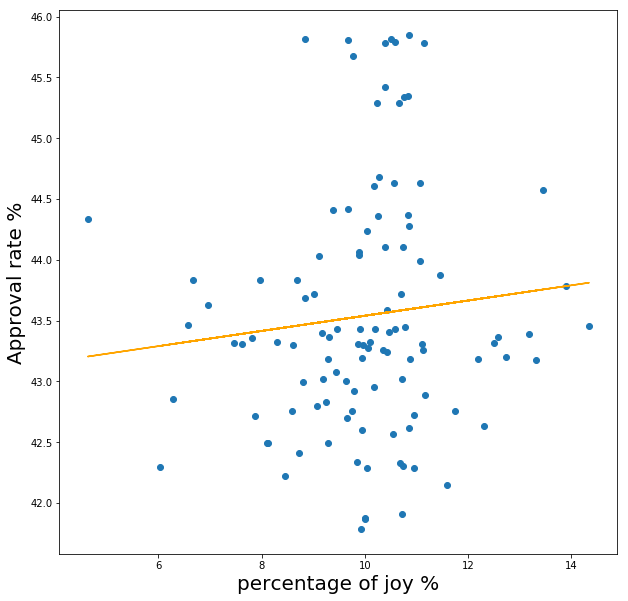

In [13]:
pos_x = []
app = []
for i in reddit_percentage:
    if reddit_percentage[i]['num'] >100:
        pos_x.append(reddit_percentage[i]['emo']['joy'])#+reddit_percentage[i]['png']['neu']/2)
        app.append(reddit_percentage[i]['app'])

pos_x = np.array(pos_x).reshape(-1, 1)*100
app = np.array(app).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pos_x, app)  # perform linear regression
app_pred = linear_regressor.predict(pos_x) 
plt.figure(figsize = (10,10))
plt.plot(pos_x, app_pred, color='orange')
plt.scatter(pos_x,app)
plt.xlabel("percentage of joy %", fontsize = 20)
plt.ylabel("Approval rate %", fontsize = 20)
plt.show()

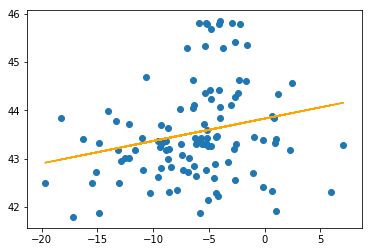

In [14]:
avg_compund = []
app = []
for i in reddit_percentage:
    if reddit_percentage[i]['num'] >100:
        avg_compund.append(reddit_percentage[i]['sum_c']/reddit_percentage[i]['num'])
        app.append(reddit_percentage[i]['app'])

avg_compund = np.array(avg_compund).reshape(-1, 1)*100
app = np.array(app).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(avg_compund, app)  # perform linear regression
app_pred = linear_regressor.predict(avg_compund) 

plt.plot(avg_compund, app_pred, color='orange')
plt.scatter(avg_compund,app)
plt.show()

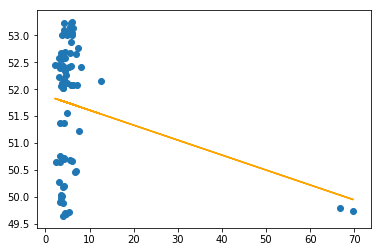

In [15]:
pos_x = []
app = []
for i in twitter_percentage:
    if twitter_percentage[i]['num'] >100:
        pos_x.append(twitter_percentage[i]['emo']['joy'])
        app.append(twitter_percentage[i]['disapp'])

pos_x = np.array(pos_x).reshape(-1, 1)*100
app = np.array(app).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pos_x, app)  # perform linear regression
app_pred = linear_regressor.predict(pos_x) 

plt.plot(pos_x, app_pred, color='orange')
plt.scatter(pos_x,app)
plt.show()

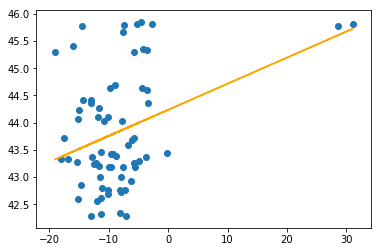

In [16]:
avg_compund = []
app = []
for i in twitter_percentage:
    if twitter_percentage[i]['num'] >100:
        avg_compund.append(twitter_percentage[i]['sum_c']/twitter_percentage[i]['num'])
        app.append(twitter_percentage[i]['app'])

avg_compund = np.array(avg_compund).reshape(-1, 1)*100
app = np.array(app).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(avg_compund, app)  # perform linear regression
app_pred = linear_regressor.predict(avg_compund) 

plt.plot(avg_compund, app_pred, color='orange')
plt.scatter(avg_compund,app)
plt.show()

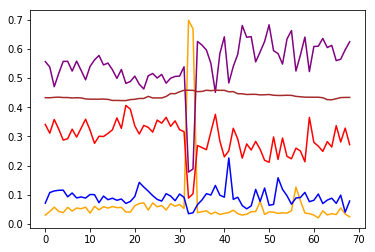

In [17]:
j = []
a = []
f = []
s = []
app = []
for i in twitter_percentage:
    if twitter_percentage[i]['num'] >100:
        j.append(twitter_percentage[i]['emo']['joy'])
        a.append(twitter_percentage[i]['emo']['anger'])
        f.append(twitter_percentage[i]['emo']['fear'])
        s.append(twitter_percentage[i]['emo']['sadness'])
        app.append(twitter_percentage[i]['app'])
plt.plot(j, color='orange')
plt.plot(a, color='red')
plt.plot(f, color='purple')
plt.plot(s, color='blue')
plt.plot(np.array(app)/100, color='brown')

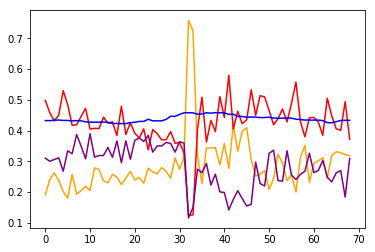

In [18]:
p = []
n = []
ne = []
app = []
avg = []
for i in twitter_percentage:
    if twitter_percentage[i]['num'] >100:
        p.append(twitter_percentage[i]['png']['pos'])
        n.append(twitter_percentage[i]['png']['neg'])
        ne.append(twitter_percentage[i]['png']['neu'])
        app.append(twitter_percentage[i]['app'])
        avg.append(twitter_percentage[i]['sum_c']/reddit_percentage[i]['num'])
plt.plot(p, color='orange')
plt.plot(n, color='red')
plt.plot(ne, color='purple')
plt.plot(np.array(app)/100, color='blue')


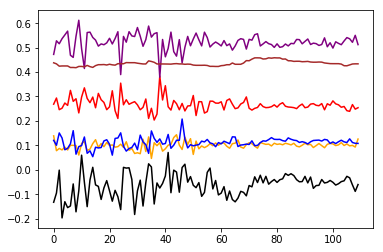

In [19]:
j = []
a = []
f = []
s = []
app = []
avg = []
for i in reddit_percentage:
    if reddit_percentage[i]['num'] >100:
        j.append(reddit_percentage[i]['emo']['joy'])
        a.append(reddit_percentage[i]['emo']['anger'])
        f.append(reddit_percentage[i]['emo']['fear'])
        s.append(reddit_percentage[i]['emo']['sadness'])
        app.append(reddit_percentage[i]['app'])
        avg.append(reddit_percentage[i]['sum_c']/reddit_percentage[i]['num'])
plt.plot(j, color='orange')
plt.plot(a, color='red')
plt.plot(f, color='purple')
plt.plot(s, color='blue')
plt.plot(np.array(app)/100, color='brown')
plt.plot(avg, color='black')

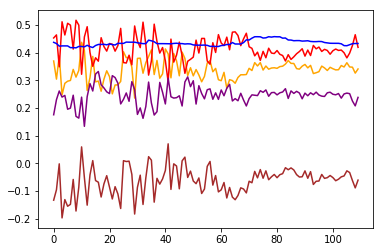

In [20]:
p = []
n = []
ne = []
app = []
avg = []
for i in reddit_percentage:
    if reddit_percentage[i]['num'] >100:
        p.append(reddit_percentage[i]['png']['pos'])
        n.append(reddit_percentage[i]['png']['neg'])
        ne.append(reddit_percentage[i]['png']['neu'])
        app.append(reddit_percentage[i]['app'])
        avg.append(reddit_percentage[i]['sum_c']/reddit_percentage[i]['num'])
plt.plot(p, color='orange')
plt.plot(n, color='red')
plt.plot(ne, color='purple')
plt.plot(np.array(app)/100, color='blue')
plt.plot(avg, color='brown')

In [21]:
reddit_dl = []
for d in reddit_percentage:
    if reddit_percentage[d]['num']>50:
        reddit_dl.append(d)

reddit_dl = reddit_dl[14:]


In [22]:
reddit_dl

[datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 12, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 14, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0),
 datetime.datetime(2020, 1, 16, 0, 0),
 datetime.datetime(2020, 1, 19, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 21, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 

In [23]:
twitter_dl = []
for d in twitter_percentage:
    if twitter_percentage[d]['num']>100:
        twitter_dl.append(d)

twitter_dl

[datetime.datetime(2020, 2, 25, 0, 0),
 datetime.datetime(2020, 2, 26, 0, 0),
 datetime.datetime(2020, 2, 27, 0, 0),
 datetime.datetime(2020, 2, 28, 0, 0),
 datetime.datetime(2020, 2, 29, 0, 0),
 datetime.datetime(2020, 3, 1, 0, 0),
 datetime.datetime(2020, 3, 2, 0, 0),
 datetime.datetime(2020, 3, 3, 0, 0),
 datetime.datetime(2020, 3, 4, 0, 0),
 datetime.datetime(2020, 3, 5, 0, 0),
 datetime.datetime(2020, 3, 6, 0, 0),
 datetime.datetime(2020, 3, 7, 0, 0),
 datetime.datetime(2020, 3, 8, 0, 0),
 datetime.datetime(2020, 3, 9, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 11, 0, 0),
 datetime.datetime(2020, 3, 12, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 14, 0, 0),
 datetime.datetime(2020, 3, 15, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 3, 19, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 21, 0,

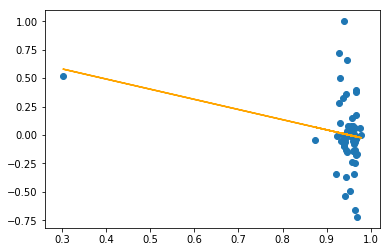

In [24]:
twitter_png_df = []
twitter_app_df = []

bad_sum = lambda x, y, i: x[y[i]]['emo']['anger']+x[y[i]]['emo']['fear']+x[y[i]]['emo']['sadness']
good_sum = lambda x, y, i: x[y[i]]['emo']['joy']



for i in range(1, len(twitter_dl)):
    twitter_png_df.append(bad_sum(twitter_percentage, twitter_dl, i))
    twitter_app_df.append(twitter_percentage[twitter_dl[i]]['app']-twitter_percentage[twitter_dl[i-1]]['app'])

twitter_png_df = twitter_png_df[:32]+twitter_png_df[34:]
twitter_app_df = twitter_app_df[:32]+ twitter_app_df[34:]
twitter_png_df = twitter_png_df[1:]
twitter_app_df = twitter_app_df[:-1]
twitter_png_df = np.array(twitter_png_df).reshape(-1, 1)
twitter_app_df = np.array(twitter_app_df).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(twitter_png_df, twitter_app_df)  # perform linear regression
app_df_pred = linear_regressor.predict(twitter_png_df) 

plt.plot(twitter_png_df, app_df_pred, color='orange')
plt.scatter(twitter_png_df,twitter_app_df)
plt.show()


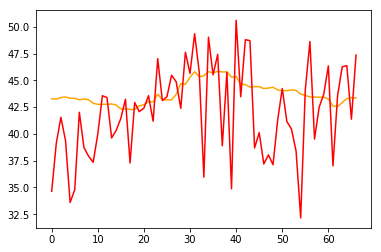

40 {'emo': {'anger': 0.230078310393925, 'fear': 0.6409587090650214, 'joy': 0.03691267204556241, 'sadness': 0.09205030849549121}, 'png': {'pos': 0.3581395348837209, 'neg': 0.44299952539155196, 'neu': 0.1988609397247271}, 'num': 84280, 'sum_c': -6300.148200001372, 'app': 45.788477, 'disapp': 50.027034}


In [25]:
twitter_png_df = []
twitter_app_df = []
for i in range(len(twitter_dl)):
    twitter_png_df.append(twitter_percentage[twitter_dl[i]]['png']['pos']+twitter_percentage[twitter_dl[i]]['png']['neu']/2)
    twitter_app_df.append(twitter_percentage[twitter_dl[i]]['app'])

twitter_png_df = twitter_png_df[:32]+twitter_png_df[34:]
twitter_app_df = twitter_app_df[:32]+ twitter_app_df[34:]
plt.plot(twitter_app_df, color='orange')
plt.plot(np.array(twitter_png_df)*100, color='red')
plt.show()
print(twitter_png_df.index(max(twitter_png_df)),twitter_percentage[twitter_dl[twitter_png_df.index(max(twitter_png_df))]])

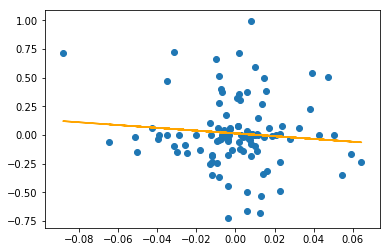

In [26]:
reddit_png_df = []
reddit_app_df = []
for i in range(1, len(reddit_dl)):
    reddit_png_df.append(reddit_percentage[reddit_dl[i]]['emo']['joy']-reddit_percentage[reddit_dl[i-1]]['emo']['joy'])
    reddit_app_df.append(reddit_percentage[reddit_dl[i]]['app']-reddit_percentage[reddit_dl[i-1]]['app'])
reddit_png_df = reddit_png_df[1:]
reddit_app_df = reddit_app_df[:-1]
reddit_png_df = np.array(reddit_png_df).reshape(-1, 1)
reddit_app_df = np.array(reddit_app_df).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(reddit_png_df, reddit_app_df)  # perform linear regression
app_df_pred = linear_regressor.predict(reddit_png_df) 

plt.plot(reddit_png_df, app_df_pred, color='orange')
plt.scatter(reddit_png_df,reddit_app_df)
plt.show()

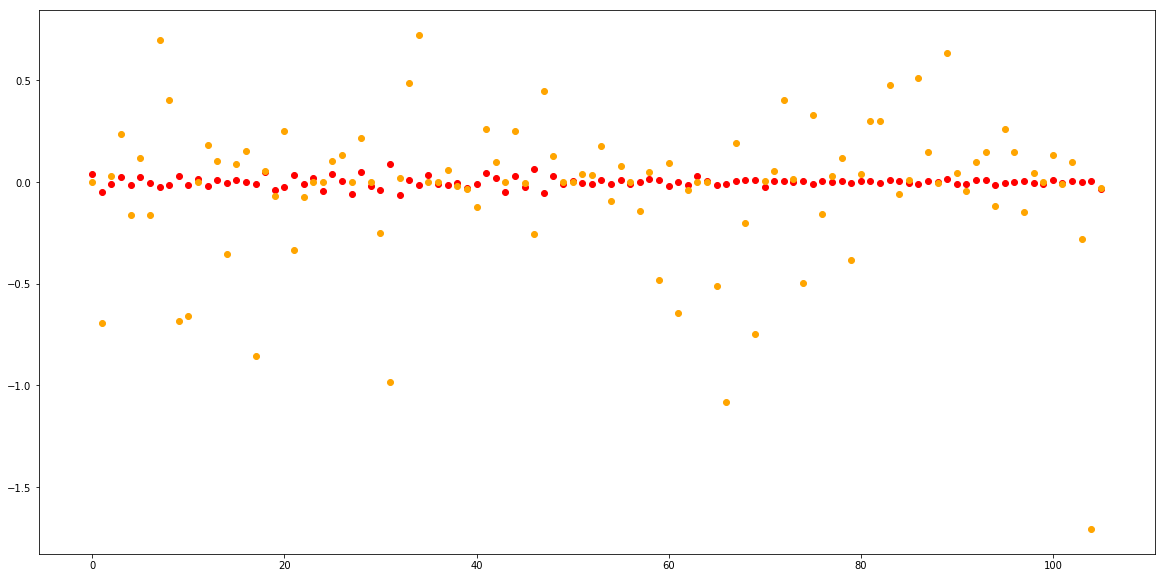

0


In [27]:
plt.figure(figsize=(20,10))
reddit_png_df = []
reddit_dapp_df = []

for i in range(1,len(reddit_dl)):
    reddit_png_df.append((bad_sum(reddit_percentage, reddit_dl, i)-bad_sum(reddit_percentage, reddit_dl, i-1)))
    reddit_dapp_df.append((reddit_percentage[reddit_dl[i]]['disapp']-reddit_percentage[reddit_dl[i-1]]['disapp']))
plt.scatter([i for i in range(len(reddit_dl)-2)],np.array(reddit_png_df[1:]), color='red')
plt.scatter([i for i in range(len(reddit_dl)-2)], np.array(reddit_dapp_df[:-1]), color='orange')
plt.show()
print(sum(np.array(reddit_png_df[1:]) == np.array(reddit_dapp_df[:-1])))

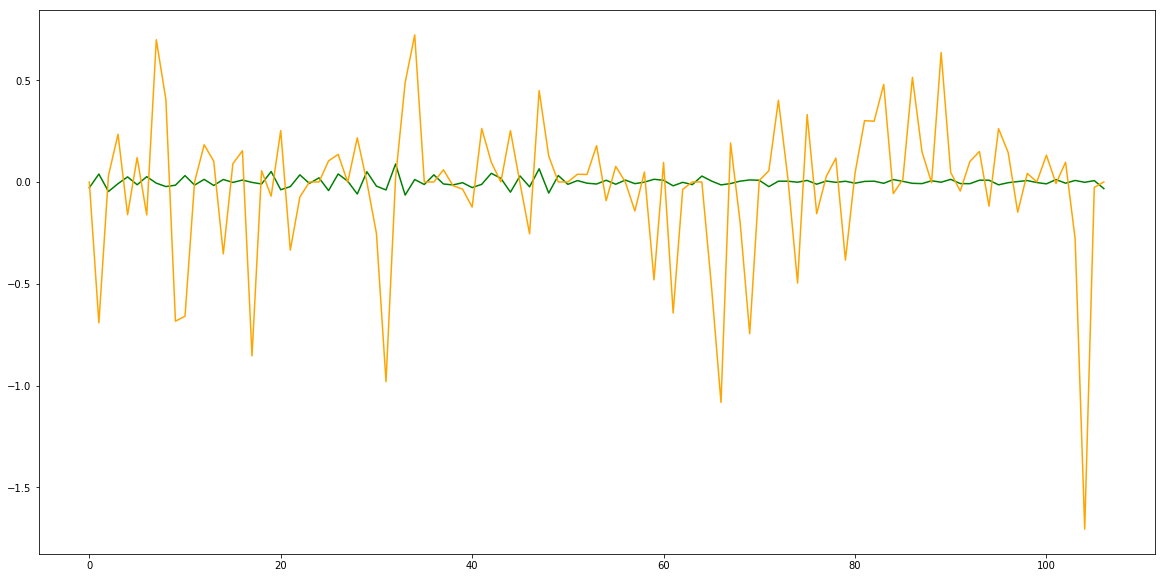

In [28]:
n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
plt.figure(figsize=(20,10))
#yy = lfilter(b,a,reddit_png_df)
#yy = moving_average(reddit_png_df)
#xx = moving_average(reddit_dapp_df)
#plt.plot(yy, linewidth=2, c='blue')
#plt.plot(xx, linewidth=2, c='green')
plt.plot(np.array(reddit_png_df), color='green')
plt.plot(np.array(reddit_dapp_df), color='orange')
plt.show()

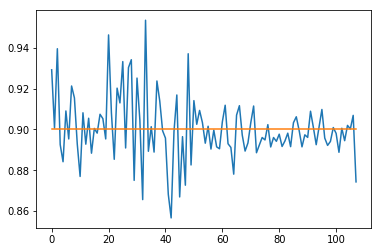

In [29]:
reddit_attitude = []
for i in range(len(reddit_dl)):
    reddit_attitude.append((bad_sum(reddit_percentage, reddit_dl, i)))
plt.plot(reddit_attitude)
plt.plot([np.mean(reddit_attitude)]*len(reddit_attitude))

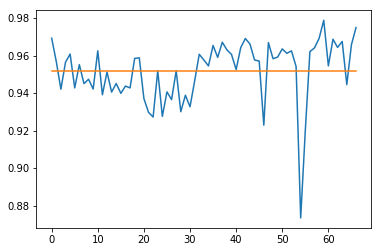

In [30]:
twitter_attitude = []
for i in range(len(twitter_dl)):
    if (bad_sum(twitter_percentage, twitter_dl, i)) > 0.8:
        twitter_attitude.append((bad_sum(twitter_percentage, twitter_dl, i)))
plt.plot(twitter_attitude)
plt.plot([np.mean(twitter_attitude)]*len(twitter_attitude))

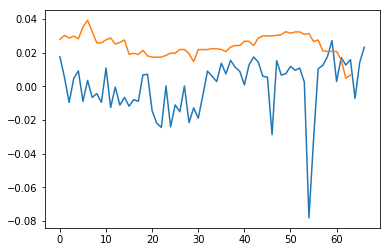

In [31]:
t_m = np.mean(twitter_attitude)
twitter_attitude_m = []
twitter_disapp_m = []
for i in range(len(twitter_dl)):
    if (bad_sum(twitter_percentage, twitter_dl, i)) > 0.8:
        twitter_attitude_m.append((bad_sum(twitter_percentage, twitter_dl, i))-t_m)
        twitter_disapp_m.append((reddit_percentage[reddit_dl[i]]['disapp'])-50)
plt.plot(twitter_attitude_m)
plt.plot(np.array(twitter_disapp_m[3:])/100)

RMSE of simple linear regression with Reddit test data: 0.5519945150810982
MSE of simple linear regression with Reddit test data: 0.3046979446796167
R^2 of simple linear regression with Reddit test data: 0.3022184209631855
RMSE of simple linear regression with Twitter test data: 0.28685591930271903
MSE of simple linear regression with Twitter test data: 0.08228631843900806
R^2 of simple linear regression with Twitter test data: 0.8738545709812621


/Users/yindima/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


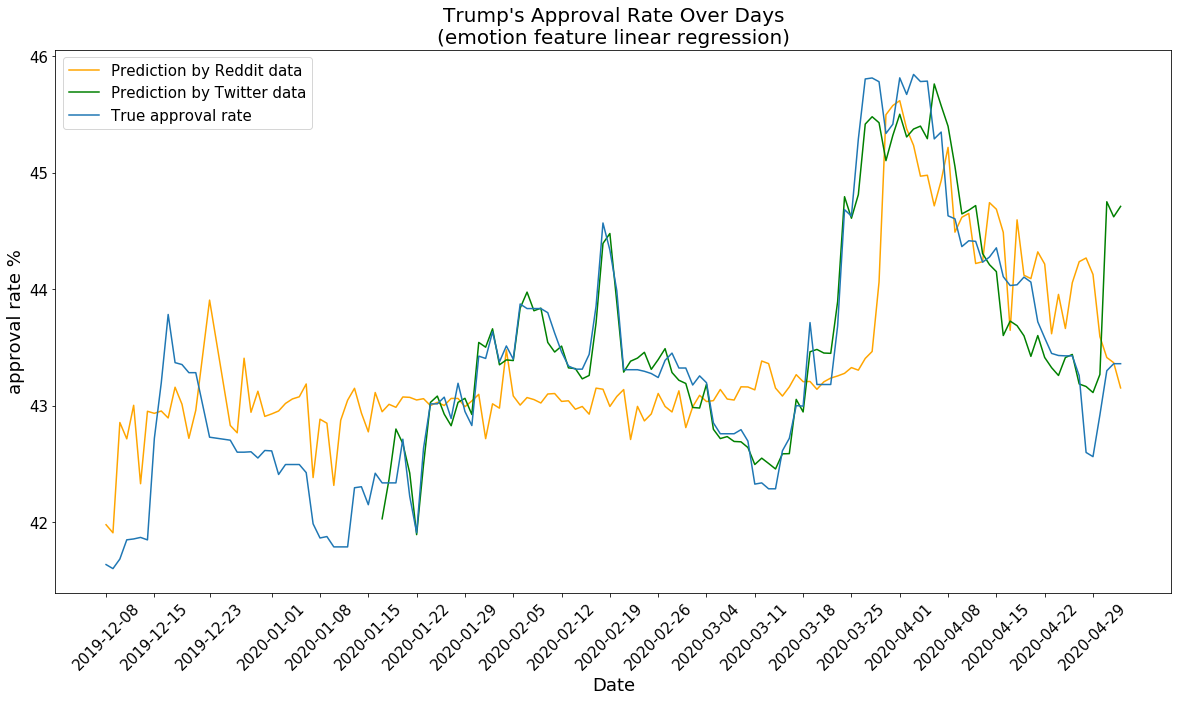

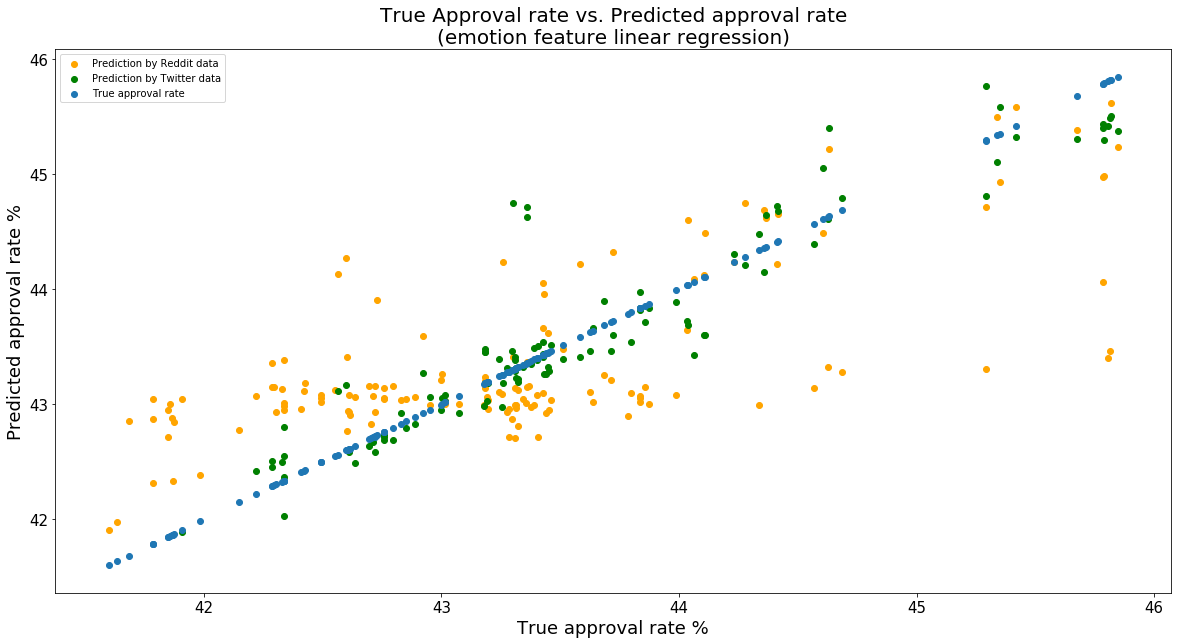

In [32]:
rd = rd.drop(['neg', 'pos', 'neu', 'sum_c'], axis=1)

td = td.drop(['neg', 'pos', 'neu', 'sum_c'], axis=1)



#build model with reddit
X_r, y_r = rd.drop(['app','disapp'], axis=1)*100, rd.app
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=1234)
model_r = linear_model.LinearRegression()
model_r.fit(X_train, y_train)
y_test_pred = model_r.predict(X_test)
print("RMSE of simple linear regression with Reddit test data:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("MSE of simple linear regression with Reddit test data:", metrics.mean_squared_error(y_test, y_test_pred))
print("R^2 of simple linear regression with Reddit test data:", metrics.r2_score(y_test, y_test_pred))

#build model with twitter
X_t, y_t = td.drop(['app'], axis=1)*10, td.app
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=1234)
model_t = linear_model.LinearRegression()
model_t.fit(X_train, y_train)
y_test_pred = model_t.predict(X_test)
print("RMSE of simple linear regression with Twitter test data:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("MSE of simple linear regression with Twitter test data:", metrics.mean_squared_error(y_test, y_test_pred))
print("R^2 of simple linear regression with Twitter test data:", metrics.r2_score(y_test, y_test_pred))

#Plot the over all curve to see how badly it fits
lr_pred = pd.concat([pd.Series(model_r.predict(X_r)),pd.Series(pd.concat([pd.Series([np.nan]*(len(X_r)-len(X_t))), pd.Series(model_t.predict(X_t))]).reset_index(drop = True)), y_r.reset_index(drop = True)], axis = 1)
lr_pred.columns = ['r_p', 't_p', 'app']
lr_pred.index = y_r.index
fig, ax = plt.subplots(1, figsize = (20,10))
plt.plot(lr_pred.r_p, c = 'orange', label = 'Prediction by Reddit data')
plt.plot(lr_pred.t_p, c = 'green', label = 'Prediction by Twitter data')
plt.plot(lr_pred.app, label = 'True approval rate')
tic = []
labe = []
for i in range(len(lr_pred.index)):
    if i % 7 == 0:
        tic.append(lr_pred.index[i])
        labe.append(str(lr_pred.index[i])[:10])
plt.xticks(tic, labe, rotation = 45,fontsize = '15')
plt.yticks(fontsize = '15')
plt.xlabel('Date', fontsize = '18')
plt.ylabel('approval rate %', fontsize = '18')
plt.title('Trump\'s Approval Rate Over Days\n(emotion feature linear regression)', fontsize = '20')
plt.legend(fontsize = 15)
plt.show()

fig, ax = plt.subplots(1, figsize = (20,10))
plt.scatter(lr_pred.app,lr_pred.r_p, c = 'orange', label = 'Prediction by Reddit data')
plt.scatter(lr_pred.app,lr_pred.t_p, c = 'green', label = 'Prediction by Twitter data')
plt.scatter(lr_pred.app,lr_pred.app , label = 'True approval rate')
plt.xlabel('True approval rate %', fontsize = '18')
plt.ylabel('Predicted approval rate %', fontsize = '18')
plt.yticks(fontsize = '15')
plt.xticks(fontsize = '15')
plt.title('True Approval rate vs. Predicted approval rate\n(emotion feature linear regression)', fontsize = '20')
plt.legend()
plt.show()

# AutoRegressive

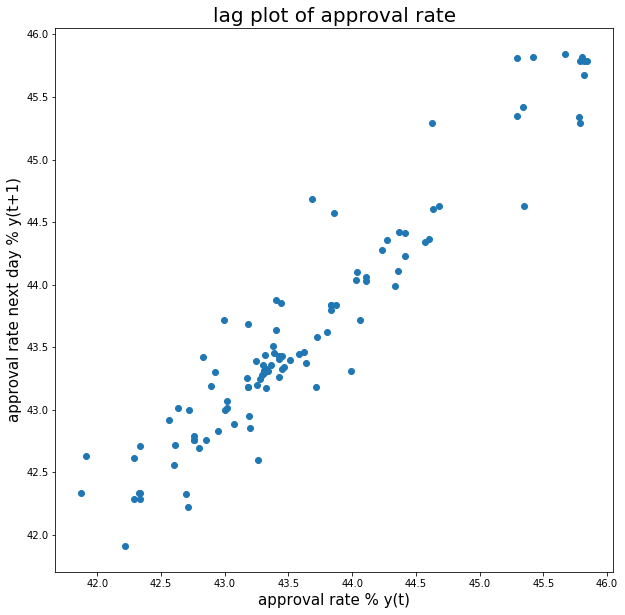

In [33]:
plt.figure(figsize = (10,10))
pd.plotting.lag_plot(td.app)
plt.xlabel("approval rate % y(t)", fontsize = 15)
plt.ylabel("approval rate next day % y(t+1)", fontsize = 15)
plt.title("lag plot of approval rate",fontsize = 20)
plt.show()

In [34]:
td_auto = pd.concat([td.app.shift(-1), td.app, td.joy*100, td.fear*100, td.sadness*100, td.anger*100, td.num], axis=1)
td_auto

,app,app,joy,fear,sadness,anger,num
2020-01-09,42.337860,41.876866,0.000000,0.000000,0.000000,100.000000,1.0
2020-01-17,42.337860,42.337860,0.000000,0.000000,0.000000,100.000000,1.0
2020-01-19,42.713089,42.337860,100.000000,0.000000,0.000000,0.000000,1.0
2020-01-20,42.222053,42.713089,0.000000,50.000000,0.000000,50.000000,2.0
2020-01-21,41.909656,42.222053,16.666667,50.000000,16.666667,16.666667,6.0
2020-01-22,42.635503,41.909656,11.111111,50.000000,5.555556,33.333333,18.0
2020-01-23,43.016357,42.635503,5.555556,66.666667,5.555556,22.222222,18.0
2020-01-24,43.016357,43.016357,11.111111,48.148148,7.407407,33.333333,27.0
2020-01-25,43.074199,43.016357,0.000000,60.000000,11.428571,28.571429,35.0
2020-01-26,42.890308,43.074199,0.000000,71.428571,8.571429,20.000000,35.0


In [35]:
td_auto.columns = ['app_next_day','app','joy', 'fear', 'sadness', 'anger', 'num']

In [36]:
td_auto = td_auto[2:-1]
td_auto

,app_next_day,app,joy,fear,sadness,anger,num
2020-01-19,42.713089,42.337860,100.000000,0.000000,0.000000,0.000000,1.0
2020-01-20,42.222053,42.713089,0.000000,50.000000,0.000000,50.000000,2.0
2020-01-21,41.909656,42.222053,16.666667,50.000000,16.666667,16.666667,6.0
2020-01-22,42.635503,41.909656,11.111111,50.000000,5.555556,33.333333,18.0
2020-01-23,43.016357,42.635503,5.555556,66.666667,5.555556,22.222222,18.0
2020-01-24,43.016357,43.016357,11.111111,48.148148,7.407407,33.333333,27.0
2020-01-25,43.074199,43.016357,0.000000,60.000000,11.428571,28.571429,35.0
2020-01-26,42.890308,43.074199,0.000000,71.428571,8.571429,20.000000,35.0
2020-01-27,43.193389,42.890308,0.000000,50.000000,12.500000,37.500000,32.0
2020-01-28,42.951310,43.193389,4.347826,34.782609,8.695652,52.173913,23.0


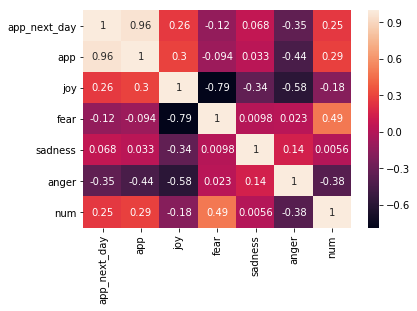

In [37]:
td_auto = td_auto[td_auto['num']>100]
sn.heatmap(td_auto.corr(), annot=True)
plt.show()

In [38]:
X, y = td_auto.drop(['app_next_day', 'num','joy'], axis=1), td_auto.app_next_day
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R^2:", metrics.r2_score(y_test, y_test_pred))

RMSE: 0.31430208791889114
R^2: 0.9013687510691428


In [40]:
print("Approval = ", end='')
for i, c in enumerate(model.coef_):
    name = X.columns[i]
    flag = '+' if c > 0 else '-'
    c = abs(c)
    item = "{} {:6f} * {}".format(flag, c, name)
    print(item, end=' ')
print(" + {:.2f}".format(model.intercept_))
print(stats.summary(model, X, y, ['app','fear','sadness','anger']))

Approval = + 1.002820 * app - 0.003700 * fear + 0.003895 * sadness + 0.016696 * anger  + -0.47
Residuals:
    Min      1Q  Median      3Q     Max
-0.8708 -0.1371   0.019  0.0905  0.7613


Coefficients:
            Estimate  Std. Error   t value   p value
_intercept -0.466906    1.618491   -0.2885  0.773868
app         1.002820    0.005608  178.8217  0.000000
fear       -0.003700    0.002800   -1.3217  0.190747
sadness     0.003895    0.011649    0.3343  0.739180
anger       0.016696    0.004995    3.3425  0.001362
---
R-squared:  0.93696,    Adjusted R-squared:  0.93296
F-statistic: 234.10 on 4 features
None


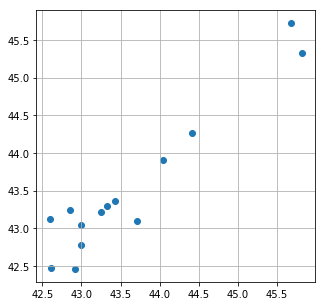

In [41]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_test_pred)
plt.grid()
plt.show()

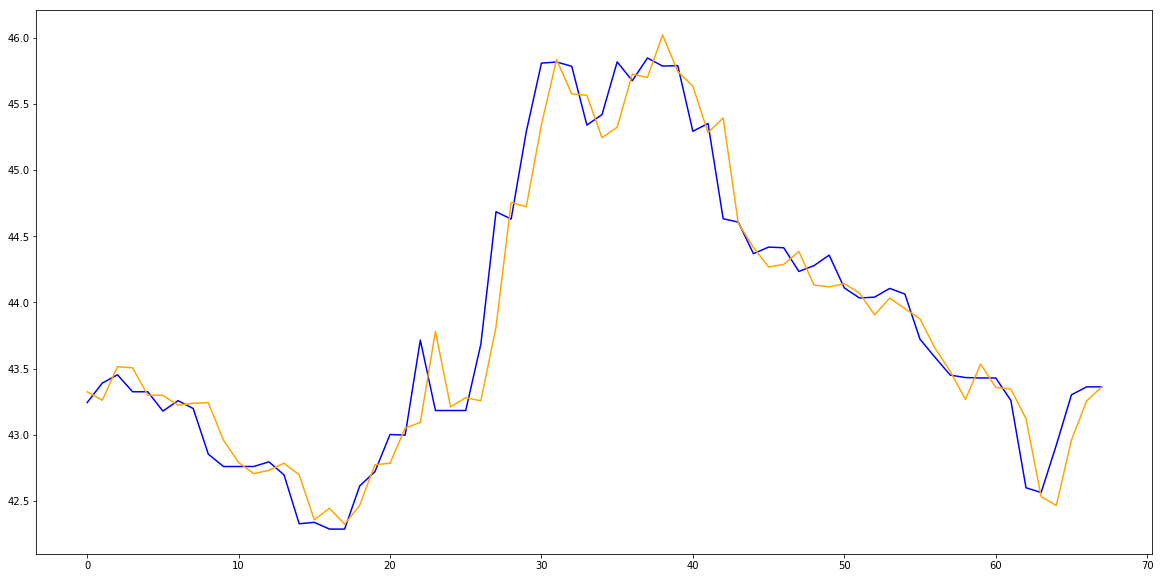

In [42]:
plt.figure(figsize = (20,10))
t_p_app = model.predict(X)
t_t_app = td_auto['app_next_day'].reset_index(drop = True)

plt.plot(t_t_app, c = 'blue')
plt.plot(t_p_app, c = 'orange')

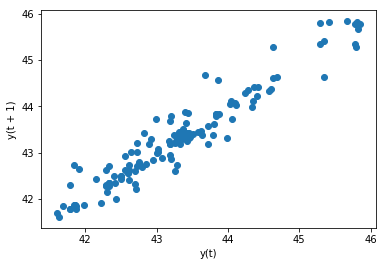

In [43]:
pd.plotting.lag_plot(rd.app)

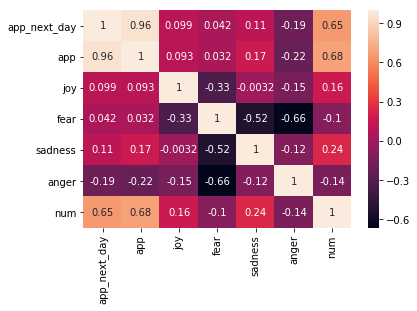

In [44]:
rd_auto = pd.concat([rd.app.shift(-1), rd.app, rd.joy*100, rd.fear*100, rd.sadness*100, rd.anger*100, rd.num], axis=1)
rd_auto.columns = ['app_next_day','app','joy', 'fear', 'sadness', 'anger', 'num']
rd_auto = rd_auto[21:-1]
rd_auto = rd_auto[rd_auto['num']>50]
sn.heatmap(rd_auto.corr(), annot=True)
plt.show()

In [45]:
X, y = rd_auto.drop(['app_next_day', 'num', 'joy'], axis=1), rd_auto.app_next_day
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R^2:", metrics.r2_score(y_test, y_test_pred))

RMSE: 0.2752824324283281
R^2: 0.9321092293163996


In [47]:
print("Approval = ", end='')
for i, c in enumerate(model.coef_):
    name = X.columns[i]
    flag = '+' if c > 0 else '-'
    c = abs(c)
    item = "{} {:6f} * {}".format(flag, c, name)
    print(item, end=' ')
print(" + {:.2f}".format(model.intercept_))
print(stats.summary(model, X, y, ['app','fear','sadness','anger']))

Approval = + 0.983218 * app - 0.000157 * fear - 0.016797 * sadness + 0.006011 * anger  + 0.78
Residuals:
    Min      1Q  Median      3Q     Max
-0.9631 -0.0721  0.0383  0.1323  0.6945


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.784246    1.939368   0.4044  0.686696
app         0.983218    0.015776  62.3252  0.000000
fear       -0.000157    0.006077  -0.0258  0.979459
sadness    -0.016797    0.013919  -1.2068  0.230042
anger       0.006011    0.008571   0.7013  0.484528
---
R-squared:  0.92389,    Adjusted R-squared:  0.92109
F-statistic: 330.77 on 4 features
None


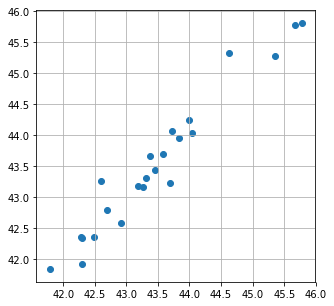

In [48]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_test_pred)
plt.grid()
plt.show()

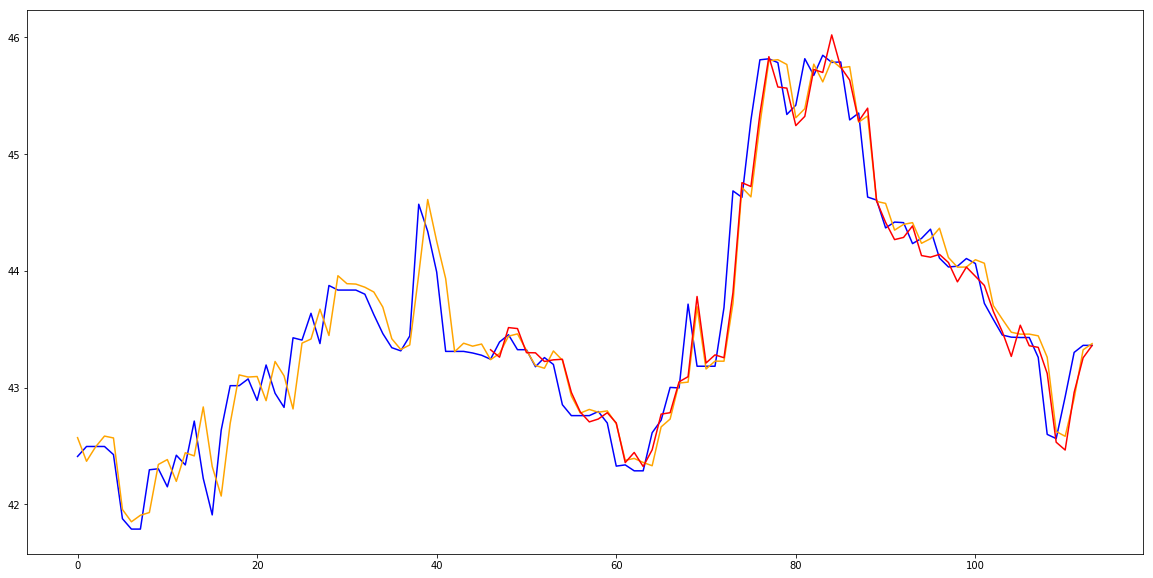

In [49]:
plt.figure(figsize = (20,10))
r_p_app = model.predict(X)
r_t_app = rd_auto['app_next_day'].reset_index(drop = True)
plt.plot(r_t_app, c = 'blue')
plt.plot(r_p_app, c = 'orange')
plt.plot(pd.concat([pd.DataFrame([np.nan]*46),pd.DataFrame(t_p_app)]).reset_index(drop = True), c = 'red')

In [59]:
pred_result = pd.concat([pd.DataFrame(r_t_app), rd_auto['app'].reset_index(drop = True), pd.DataFrame(r_p_app), pd.concat([pd.DataFrame([np.nan]*46),pd.DataFrame(t_p_app)]).reset_index(drop = True)], axis = 1)

pred_result.columns = ['true_next_app', 'true_app', 'reddit_pred', 'twitter_pred']

pred_result.index = rd_auto.index

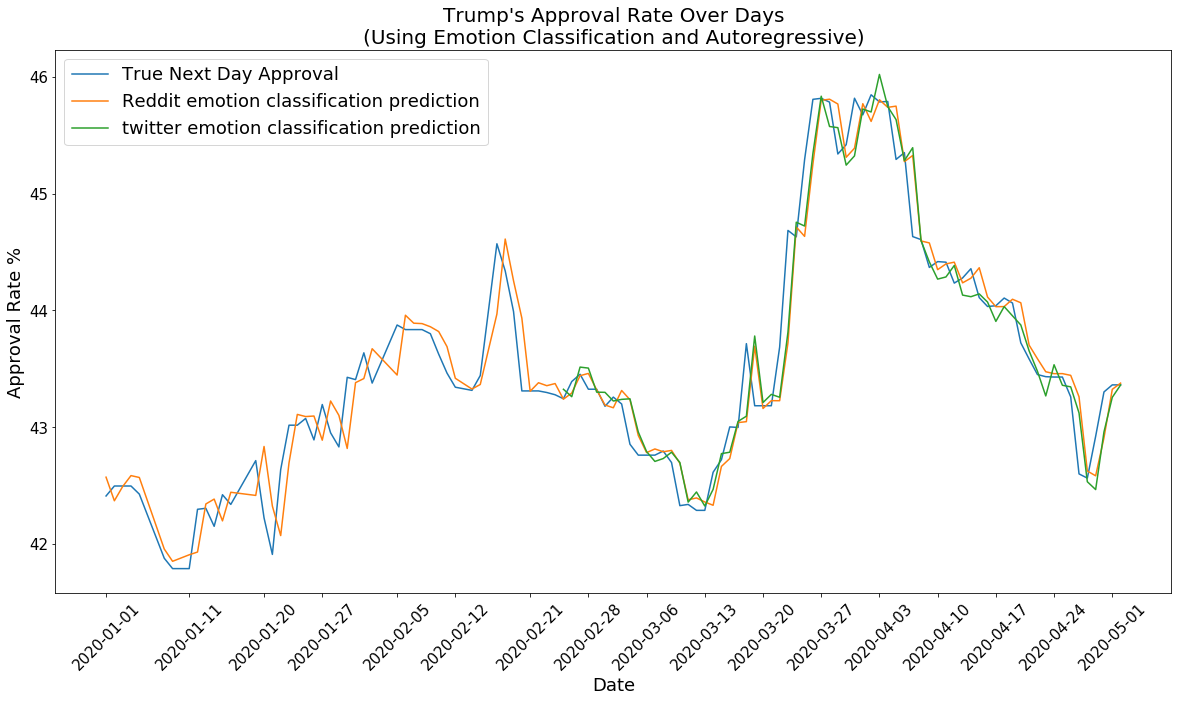

In [62]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.plot(pred_result.true_next_app, label = 'True Next Day Approval')
ax.plot(pred_result.reddit_pred, label = 'Reddit emotion classification prediction')
ax.plot(pred_result.twitter_pred, label = 'twitter emotion classification prediction')
tic = []
labe = []
for i in range(len(pred_result.index)):
    if i % 7 == 0:
        tic.append(pred_result.index[i])
        labe.append(str(pred_result.index[i])[:10])
plt.xticks(tic, labe, rotation = 45, fontsize = '15')
plt.yticks(fontsize = '15')
ax.legend(fontsize = '18')
plt.title('Trump\'s Approval Rate Over Days\n(Using Emotion Classification and Autoregressive)', fontsize = '20')
plt.xlabel('Date', fontsize = '18')
plt.ylabel('Approval Rate %', fontsize = '18')
#plt.grid()
plt.show()

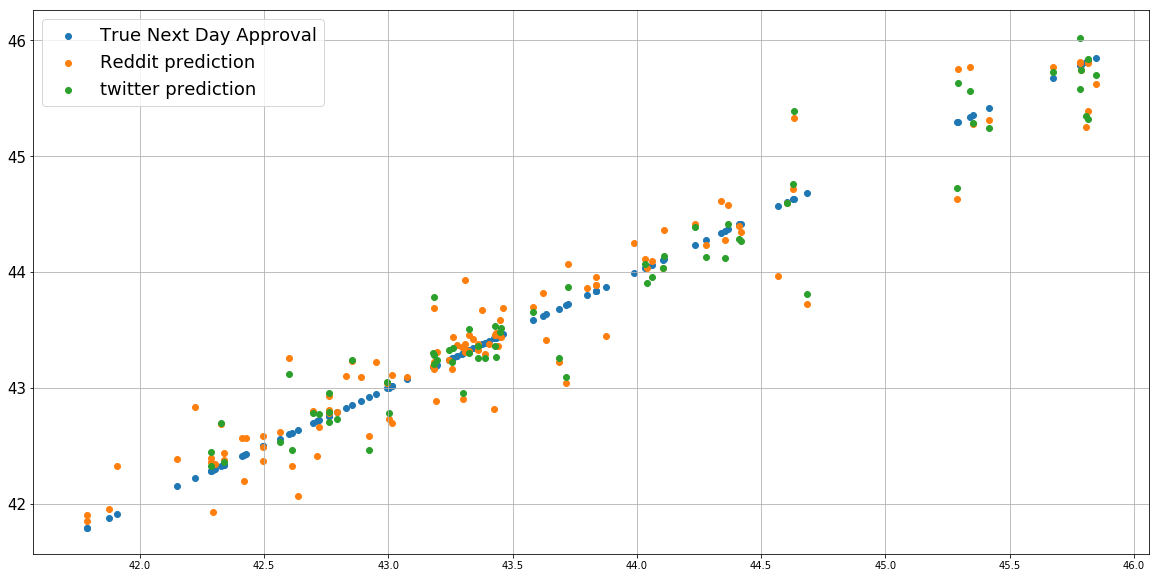

In [64]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.scatter(pred_result.true_next_app, pred_result.true_next_app, label = 'True Next Day Approval')
ax.scatter(pred_result.true_next_app,pred_result.reddit_pred, label = 'Reddit prediction')
ax.scatter(t_t_app, t_p_app, label = 'twitter prediction')
plt.yticks(fontsize = '15')
ax.legend(fontsize = '18')
plt.grid()
plt.show()

In [53]:
pred_result

,true_next_app,true_app,reddit_pred,twitter_pred
2020-01-01,42.410090,42.612555,42.571163,NaN
2020-01-02,42.495557,42.410090,42.369126,NaN
2020-01-03,42.495557,42.495557,42.491232,NaN
2020-01-04,42.495557,42.495557,42.584548,NaN
2020-01-05,42.426095,42.495557,42.568605,NaN
2020-01-08,41.876866,41.864635,41.955853,NaN
2020-01-09,41.788103,41.876866,41.850681,NaN
2020-01-11,41.788103,41.788103,41.906465,NaN
2020-01-12,42.296096,41.788103,41.930077,NaN
2020-01-13,42.304678,42.296096,42.341566,NaN


# Using Raw vector directly

In [54]:
rvd = pd.read_csv('/Users/yindima/Desktop/170 project/r_vec_df.csv')
tvd = pd.read_csv('/Users/yindima/Desktop/170 project/t_vec_df.csv')

In [55]:
rvd.columns = ['date', 'vec']
tvd.columns = ['date', 'vec']
rvd.index = rvd['date']
rvd['app'] = rd.app
rvd['next_app'] = rd.app.shift(-1)
rvd = rvd.drop(['date'], axis = 1)
tvd.index = tvd['date']
tvd['app'] = td.app
tvd['next_app'] = td.app.shift(-1)
tvd = tvd.drop(['date'], axis = 1)

In [56]:
rvd.head(3)

,vec,app,next_app
date,,,
2019-12-08,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41.636260,41.601551
2019-12-09,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41.601551,41.683886
2019-12-10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41.683886,41.848714


In [57]:
rvdd = {}
for i in range(len(rvd)):
    s = rvd.iloc[i].vec
    s = s.strip('[').rstrip(']').split(',')
    for z in range(len(s)):
        s[z] = float(s[z])
    rvdd[rvd.iloc[i].name] = np.array(s)
rvdd = pd.DataFrame.from_dict(rvdd, orient = 'index')

tvdd = {}
for i in range(len(tvd)):
    s = tvd.iloc[i].vec
    s = s.strip('[').rstrip(']').split(',')
    for z in range(len(s)):
        s[z] = float(s[z])
    tvdd[tvd.iloc[i].name] = np.array(s)
tvdd = pd.DataFrame.from_dict(tvdd, orient = 'index')

In [58]:
len(rvd)

145

In [59]:
from sklearn.svm import SVR

In [60]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
X, y = rvdd[:-1], rvd.next_app[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
svr_rbf.fit(X_train, y_train)
y_test_pred = svr_rbf.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE: 0.8355443088005601


In [61]:
r_y_p = svr_rbf.predict(X)

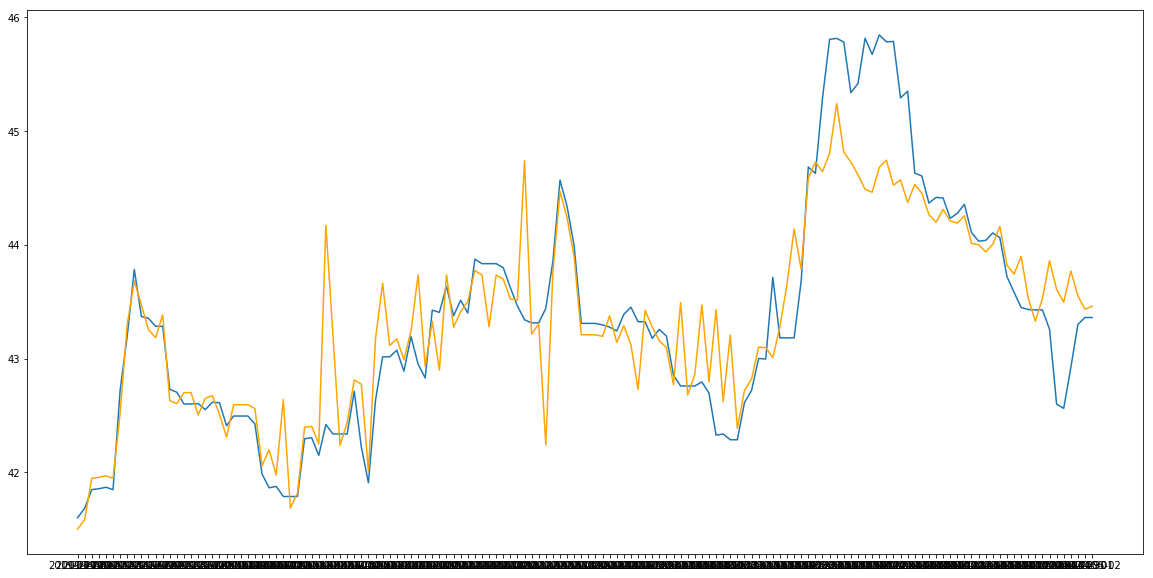

In [62]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.plot(y)
ax.plot(r_y_p, c = 'orange')
plt.show()

In [63]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
X, y = tvdd[:-1], tvd.next_app[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
svr_rbf.fit(X_train, y_train)
y_test_pred = svr_rbf.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
t_y_p = svr_rbf.predict(X)

RMSE: 0.6276478520534955


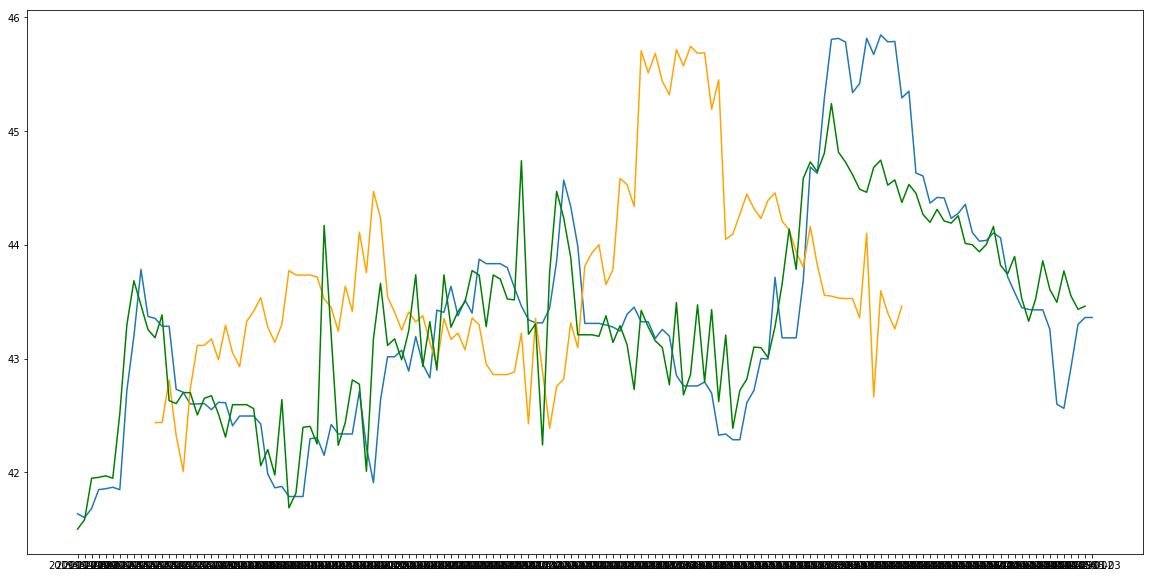

In [64]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.plot(rvd.app)
ax.plot(pd.concat([pd.Series([np.nan]*11),pd.Series(t_y_p)]).reset_index(drop = True), c = 'orange')
ax.plot(r_y_p, c = 'green')
plt.show()

In [65]:
y_raw_t = rvd.app[16:]
r_y_p = r_y_p[16:]
t_y_p = pd.concat([pd.Series([np.nan]*21),pd.Series(t_y_p)]).reset_index(drop = True)

In [66]:
raw_pred_result = pd.concat([y_raw_t.reset_index(drop = True),pd.Series(r_y_p),t_y_p , rvd.next_app[16:].reset_index(drop = True)], axis = 1)
raw_pred_result.index = rvd.app[16:].index
raw_pred_result.columns = ['app', 'r_p', 't_p', 'next_app']

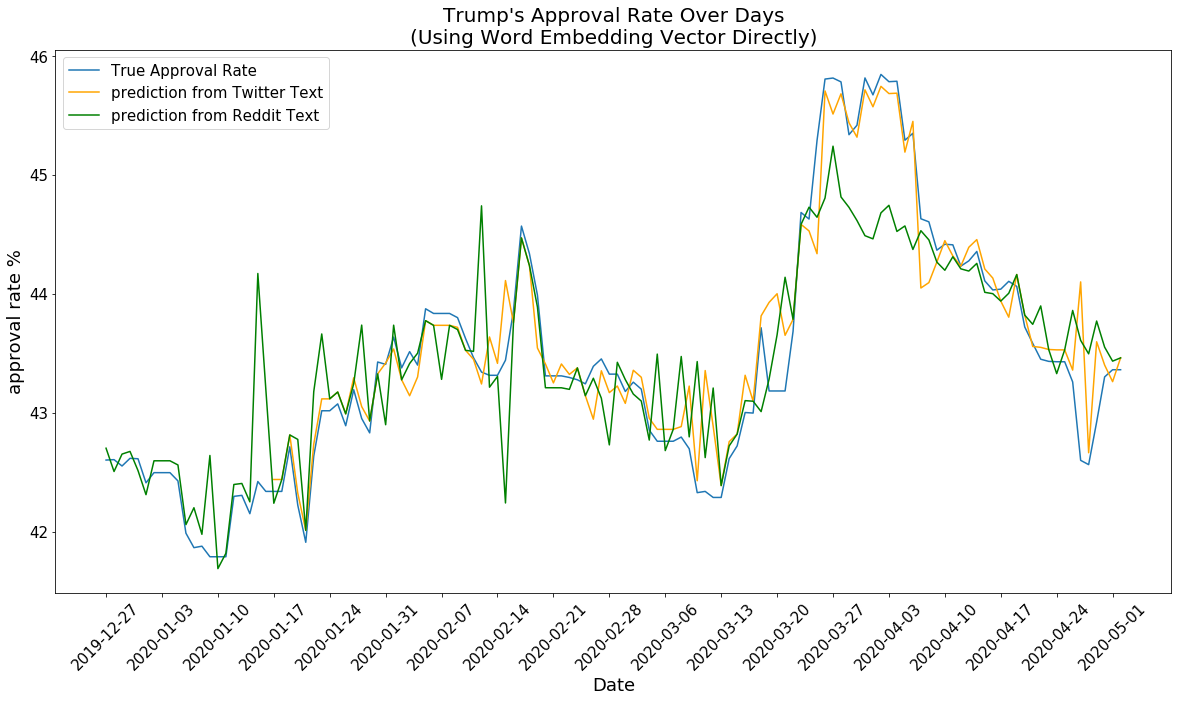

In [67]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.plot(raw_pred_result.next_app, label = 'True Approval Rate')
ax.plot(raw_pred_result.t_p, c = 'orange', label = 'prediction from Twitter Text')
ax.plot(raw_pred_result.r_p, c = 'green', label = 'prediction from Reddit Text')
plt.legend()
plt.xlabel('Date', fontsize = '18')
plt.ylabel('approval rate %', fontsize = '18')
tic = []
labe = []
for i in range(len(raw_pred_result.index)):
    if i % 7 == 0:
        tic.append(raw_pred_result.index[i])
        labe.append(str(raw_pred_result.index[i])[:10])
plt.xticks(tic, labe, rotation = 45,fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Trump\'s Approval Rate Over Days\n(Using Word Embedding Vector Directly)', fontsize = '20')
ax.legend(fontsize = '15')
#plt.grid()
plt.show()

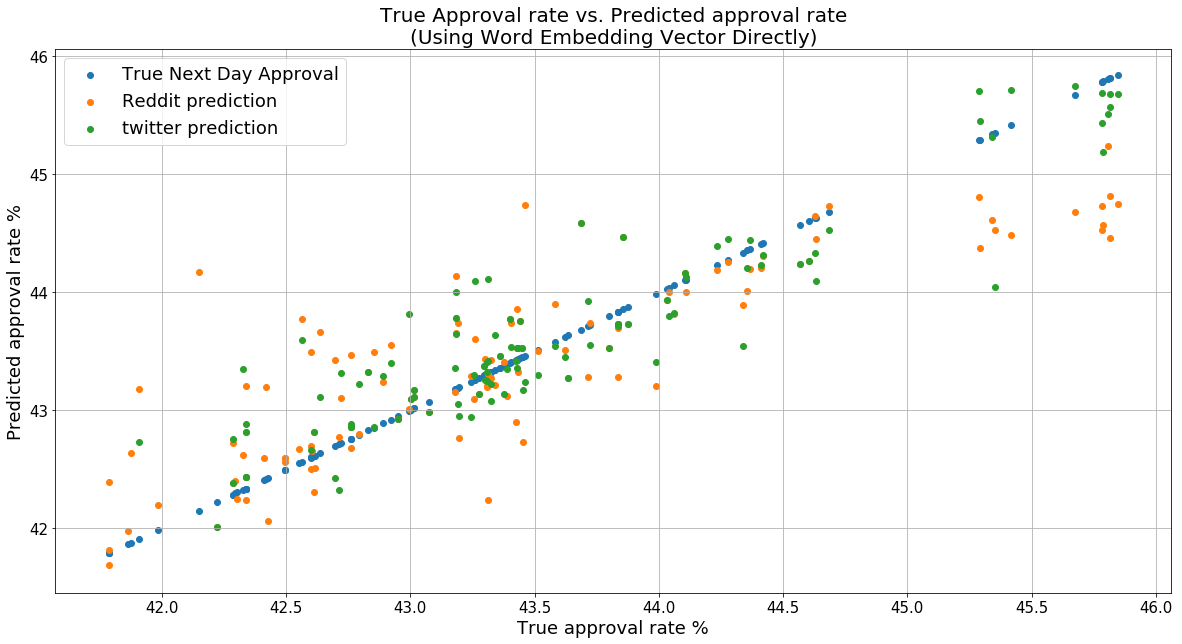

In [68]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.scatter(raw_pred_result.app, raw_pred_result.app, label = 'True Next Day Approval')
ax.scatter(raw_pred_result.app,raw_pred_result.r_p, label = 'Reddit prediction')
ax.scatter(raw_pred_result.app, raw_pred_result.t_p, label = 'twitter prediction')
plt.title('True Approval rate vs. Predicted approval rate\n(Using Word Embedding Vector Directly)', fontsize = '20')
plt.xlabel('True approval rate %', fontsize = '18')
plt.ylabel('Predicted approval rate %', fontsize = '18')
plt.yticks(fontsize = '15')
plt.xticks(fontsize = '15')
ax.legend(fontsize = '18')
plt.grid()
plt.show()

In [69]:
print('Twitter text prediction MSE:',metrics.mean_squared_error(raw_pred_result.next_app[21:-1],raw_pred_result.t_p[21:-1]))
print('Twitter text prediction RMSE:',np.sqrt(metrics.mean_squared_error(raw_pred_result.next_app[21:-1],raw_pred_result.t_p[21:-1])))
print('Twitter text prediction R^2:',metrics.r2_score(raw_pred_result.next_app[21:-1],raw_pred_result.t_p[21:-1]))
print('\n')
print('Reddit text prediction MSE:',metrics.mean_squared_error(raw_pred_result.next_app[:-1],raw_pred_result.r_p[:-1]))
print('Reddit text prediction RMSE:',np.sqrt(metrics.mean_squared_error(raw_pred_result.next_app[:-1],raw_pred_result.r_p[:-1])))
print('Reddit text prediction R^2:',metrics.r2_score(raw_pred_result.next_app[:-1],raw_pred_result.r_p[:-1]))

Twitter text prediction MSE: 0.08913384696438945
Twitter text prediction RMSE: 0.298552921547235
Twitter text prediction R^2: 0.8994230346496846


Reddit text prediction MSE: 0.25019063236029654
Reddit text prediction RMSE: 0.5001905960334486
Reddit text prediction R^2: 0.7521356170618105


In [70]:
print('Twitter emotion classification prediction MSE:',metrics.mean_squared_error(pred_result.true_next_app[46:],pred_result.twitter_pred[46:]))
print('Twitter emotion classification prediction RMSE:',np.sqrt(metrics.mean_squared_error(pred_result.true_next_app[46:],pred_result.twitter_pred[46:])))
print('Twitter emotion classification prediction R^2:',metrics.r2_score(pred_result.true_next_app[46:],pred_result.twitter_pred[46:]))
print('\n')
print('Reddit emotion classification prediction MSE:',metrics.mean_squared_error(pred_result.true_next_app,pred_result.reddit_pred))
print('Reddit emotion classification prediction RMSE:',np.sqrt(metrics.mean_squared_error(pred_result.true_next_app,pred_result.reddit_pred)))
print('Reddit emotion classification prediction R^2:',metrics.r2_score(pred_result.true_next_app,pred_result.reddit_pred))

Twitter emotion classification prediction MSE: 0.0704885847772329
Twitter emotion classification prediction RMSE: 0.26549686396873484
Twitter emotion classification prediction R^2: 0.9369622036801355


Reddit emotion classification prediction MSE: 0.07690300740441615
Reddit emotion classification prediction RMSE: 0.2773139149130749
Reddit emotion classification prediction R^2: 0.9238864697463699


In [71]:
print(min(raw_pred_result.app), max(raw_pred_result.app))

41.788103 45.845898


# Autoregressive Word vector

In [72]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
X, y = pd.concat([rvdd[:-1],rvd.app[:-1]], axis=1), rvd.next_app[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
svr_rbf.fit(X_train, y_train)
y_test_pred = svr_rbf.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
r_y_p = svr_rbf.predict(X)

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
X, y = pd.concat([tvdd[:-1],tvd.app[:-1]], axis=1), tvd.next_app[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
svr_rbf.fit(X_train, y_train)
y_test_pred = svr_rbf.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
t_y_p = svr_rbf.predict(X)

RMSE: 0.3818003558175245
RMSE: 0.38507567584917846


In [73]:
y_araw_t = rvd.app[16:]
r_y_p = r_y_p[16:]
t_y_p = pd.concat([pd.Series([np.nan]*21),pd.Series(t_y_p)]).reset_index(drop = True)
araw_pred_result = pd.concat([y_raw_t.reset_index(drop = True),pd.Series(r_y_p),t_y_p , rvd.next_app[16:].reset_index(drop = True)], axis = 1)
araw_pred_result.index = rvd.app[16:].index
araw_pred_result.columns = ['app', 'r_p', 't_p', 'next_app']

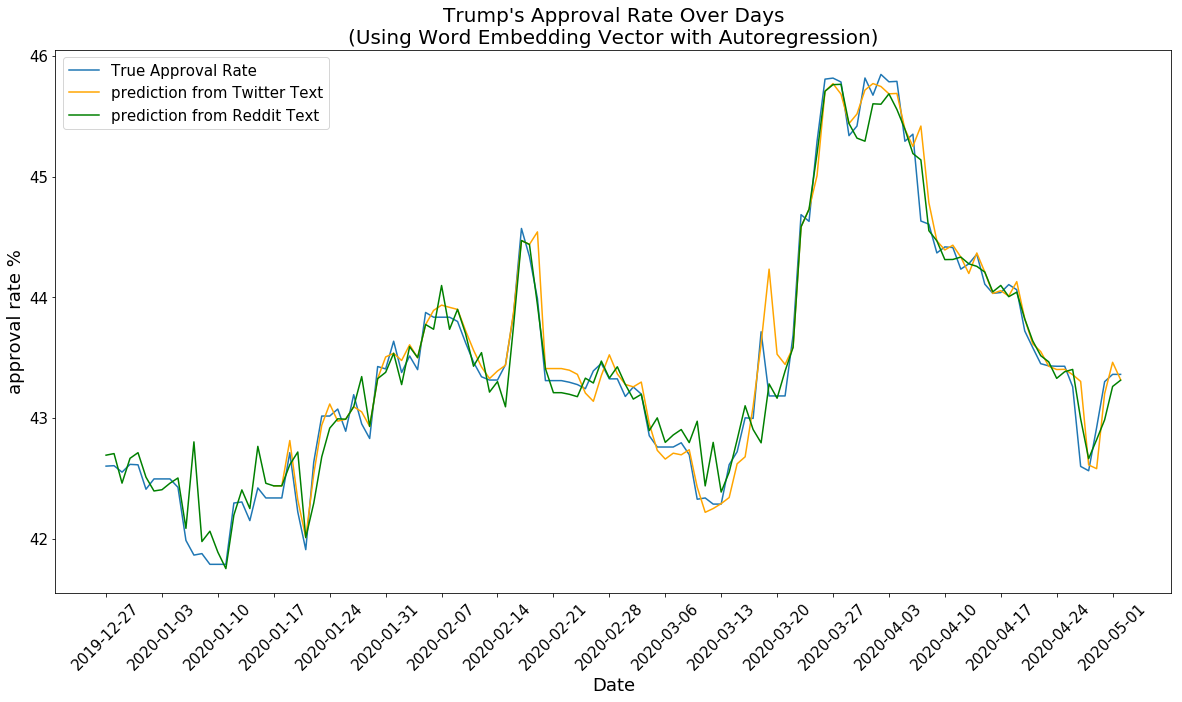

In [74]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.plot(araw_pred_result.next_app, label = 'True Approval Rate')
ax.plot(araw_pred_result.t_p, c = 'orange', label = 'prediction from Twitter Text')
ax.plot(araw_pred_result.r_p, c = 'green', label = 'prediction from Reddit Text')
plt.legend()
plt.xlabel('Date', fontsize = '18')
plt.ylabel('approval rate %', fontsize = '18')
tic = []
labe = []
for i in range(len(raw_pred_result.index)):
    if i % 7 == 0:
        tic.append(araw_pred_result.index[i])
        labe.append(str(araw_pred_result.index[i])[:10])
plt.xticks(tic, labe, rotation = 45,fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Trump\'s Approval Rate Over Days\n(Using Word Embedding Vector with Autoregression)', fontsize = '20')
ax.legend(fontsize = '15')
#plt.grid()
plt.show()

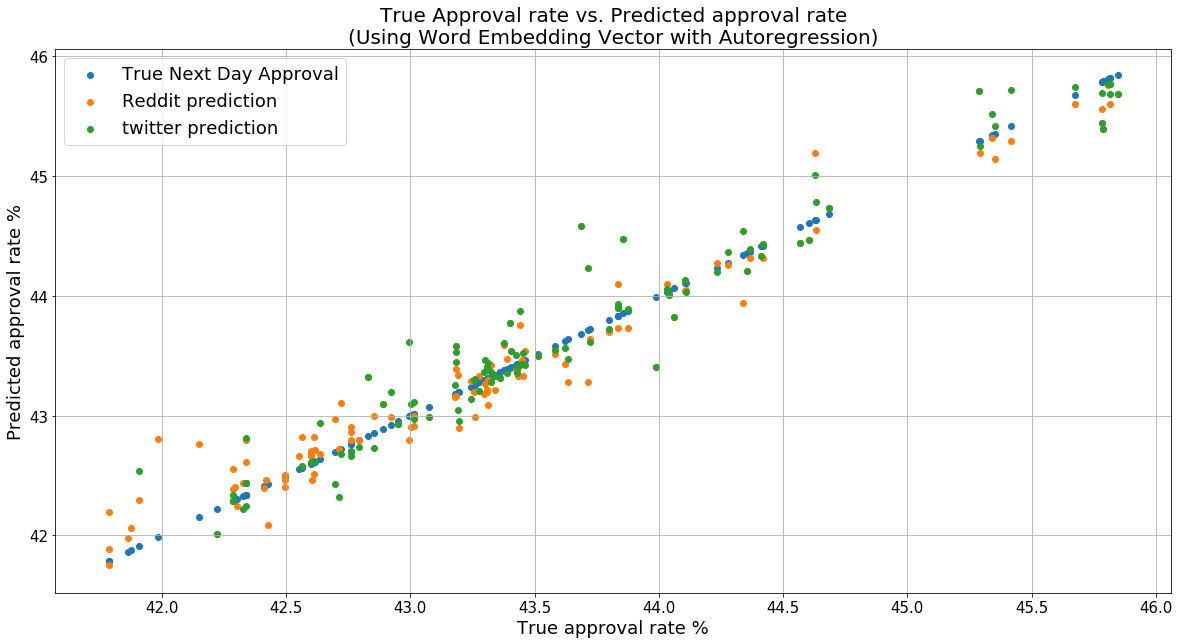

In [75]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.scatter(araw_pred_result.app, araw_pred_result.app, label = 'True Next Day Approval')
ax.scatter(araw_pred_result.app,araw_pred_result.r_p, label = 'Reddit prediction')
ax.scatter(araw_pred_result.app, araw_pred_result.t_p, label = 'twitter prediction')
plt.title('True Approval rate vs. Predicted approval rate\n(Using Word Embedding Vector with Autoregression)', fontsize = '20')
plt.xlabel('True approval rate %', fontsize = '18')
plt.ylabel('Predicted approval rate %', fontsize = '18')
plt.yticks(fontsize = '15')
plt.xticks(fontsize = '15')
ax.legend(fontsize = '18')
plt.grid()
plt.show()

In [76]:
print('Twitter autoregressive text prediction MSE:',metrics.mean_squared_error(araw_pred_result.next_app[21:-1],araw_pred_result.t_p[21:-1]))
print('Twitter autoregressive text prediction RMSE:',np.sqrt(metrics.mean_squared_error(araw_pred_result.next_app[21:-1],araw_pred_result.t_p[21:-1])))
print('Twitter autoregressive text prediction R^2:',metrics.r2_score(araw_pred_result.next_app[21:-1],araw_pred_result.t_p[21:-1]))
print('\n')
print('Reddit autoregressive text prediction MSE:',metrics.mean_squared_error(araw_pred_result.next_app[:-1],araw_pred_result.r_p[:-1]))
print('Reddit autoregressive text prediction RMSE:',np.sqrt(metrics.mean_squared_error(araw_pred_result.next_app[:-1],araw_pred_result.r_p[:-1])))
print('Reddit autoregressive text prediction R^2:',metrics.r2_score(araw_pred_result.next_app[:-1],araw_pred_result.r_p[:-1]))

Twitter autoregressive text prediction MSE: 0.03660034153375336
Twitter autoregressive text prediction RMSE: 0.19131215730777112
Twitter autoregressive text prediction R^2: 0.9587008593523322


Reddit autoregressive text prediction MSE: 0.0415296251152179
Reddit autoregressive text prediction RMSE: 0.20378818688829314
Reddit autoregressive text prediction R^2: 0.9588565135084116
